# Facebook Data Crawling
After the data is collected, we need to process the data to make it more readable and easier to analyze. We can do some simple visualization to see the data distribution and the relationship between the data. We can also do some simple data cleaning to remove the data that is not needed. In this notebook, we will do some simple data processing on the data we collected from Facebook.

In [1]:
%pip install matplotlib pandas numpy seaborn wordcloud

Note: you may need to restart the kernel to use updated packages.


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import pyplot as plt
import seaborn as sns

In [3]:
raw_df = pd.read_csv('Data/dataset.csv')


In [4]:
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 133 entries, 0 to 132
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   post_id         133 non-null    int64 
 1   post_text       133 non-null    object
 2   time            133 non-null    object
 3   timestamp       133 non-null    int64 
 4   comments        133 non-null    int64 
 5   shares          133 non-null    int64 
 6   post_url        133 non-null    object
 7   link            133 non-null    object
 8   user_url        133 non-null    object
 9   comments_full   133 non-null    object
 10  reactors        133 non-null    object
 11  reactions       133 non-null    object
 12  reaction_count  133 non-null    int64 
 13  page_id         133 non-null    object
 14  fetched_time    133 non-null    object
dtypes: int64(5), object(10)
memory usage: 15.7+ KB


In [5]:
raw_df['reactions'] =raw_df['reactions'].astype(object)
raw_df['reactions'].dtype

dtype('O')

In [6]:
raw_df.columns

Index(['post_id', 'post_text', 'time', 'timestamp', 'comments', 'shares',
       'post_url', 'link', 'user_url', 'comments_full', 'reactors',
       'reactions', 'reaction_count', 'page_id', 'fetched_time'],
      dtype='object')

## Reaction tương tác post của page


In [7]:
first_row = raw_df.iloc[0]
reactions = dict(eval(first_row['reactions']))
reactions["shares"] = first_row['shares']
reactions["comments"] = first_row['comments']

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categor

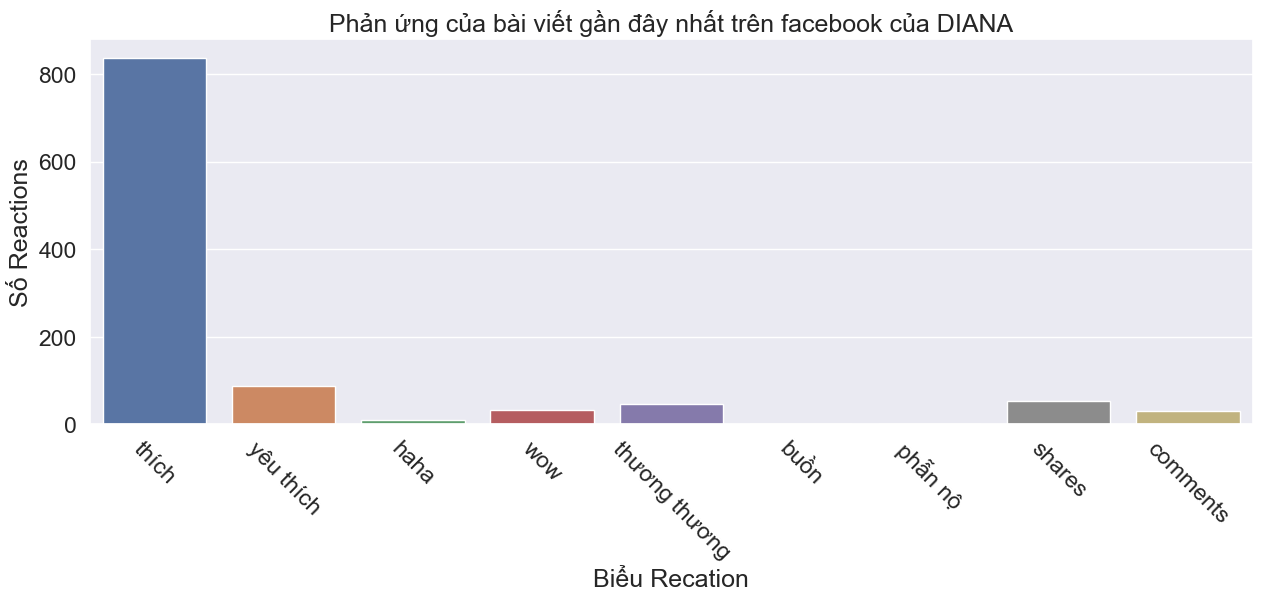

In [8]:
# hiện thị sự tương tác bài viết gần nhất
sns.set_theme(style="whitegrid")
sns.set(rc={'figure.figsize':(15,5)})
sns.set(font_scale=1.5)

# plot the reactions
fig, ax = plt.subplots()
ax = sns.barplot(x=list(reactions.keys()), y=list(reactions.values()))
ax.set_title("Phản ứng của bài viết gần đây nhất trên facebook của DIANA")
ax.set_ylabel("Số Reactions")
ax.set_xlabel("Biểu Recation")
plt.xticks(rotation=-45)
plt.show()

In [9]:
post_df_full1 = raw_df[['post_id','reactions']]
post_df_full1

post_id                                          reactions
0     742421974590977  {'thích': 837, 'yêu thích': 87, 'haha': 11, 'w...
1     741406738025834                      {'thích': 75, 'yêu thích': 2}
2     740296728136835                                      {'thích': 70}
3     738655024967672  {'thích': 8654, 'yêu thích': 615, 'haha': 30, ...
4     738561371643704  {'thích': 335, 'yêu thích': 48, 'haha': 3, 'wo...
..                ...                                                ...
128  2073620249348194       {'thích': 18, 'yêu thích': 11, 'phẫn nộ': 1}
129  2053936201316599                         {'thích': 9, 'phẫn nộ': 1}
130  1945062585537295                                       {'thích': 1}
131  1811106235599598          {'thích': 64, 'yêu thích': 10, 'haha': 1}
132  1669099749800248  {'thích': 2014, 'yêu thích': 55, 'haha': 76, '...

[133 rows x 2 columns]

In [10]:
post_df_full2=raw_df[['time','timestamp' ,'reaction_count']]
post_df_full2
     

time   timestamp  reaction_count
0    2023-11-17 12:00:19  1700197219            1017
1    2023-11-15 20:00:18  1700053218              77
2    2023-11-13 20:00:09  1699880409              70
3    2023-11-11 20:00:02  1699707602            9990
4    2023-11-10 20:02:06  1699621326             440
..                   ...         ...             ...
128  2018-12-11 20:11:16  1544533876              30
129  2018-11-28 09:54:03  1543373643              10
130  2018-09-06 19:57:23  1536238643               1
131  2018-06-10 20:00:04  1528635604              75
132  2018-01-25 20:00:00  1516885200            2148

[133 rows x 3 columns]

In [11]:
dates=post_df_full2['timestamp'].to_list()
y=post_df_full2['reaction_count'].to_list()
dates.reverse()
y.reverse()
print(len(dates),len(y))
print(dates)
print(y)


133 133
[1516885200, 1528635604, 1536238643, 1543373643, 1544533876, 1546598515, 1558771675, 1558965635, 1559573218, 1560774649, 1567259943, 1584353423, 1586179701, 1589261444, 1592476538, 1614786935, 1614786956, 1620370526, 1620372174, 1626410801, 1627352352, 1637567976, 1637567987, 1639474480, 1639705885, 1646138774, 1652674806, 1652692605, 1659081034, 1659081073, 1665464406, 1665486093, 1670432743, 1670433604, 1670815394, 1670815424, 1678712297, 1678712334, 1680526805, 1680699602, 1681131602, 1681909202, 1682341200, 1684933234, 1685100993, 1685451628, 1685520032, 1685538058, 1686056458, 1686308471, 1686571200, 1686747601, 1686834010, 1686837602, 1687179604, 1687264350, 1687437054, 1687438801, 1687654842, 1687784401, 1687867200, 1688043627, 1688389201, 1688734852, 1688990421, 1689166833, 1689249610, 1689595201, 1689858001, 1689940808, 1690256737, 1690866036, 1690894803, 1690954743, 1691150401, 1691499583, 1691586001, 1692018002, 1692190803, 1692244800, 1692450016, 1692968401, 1693314

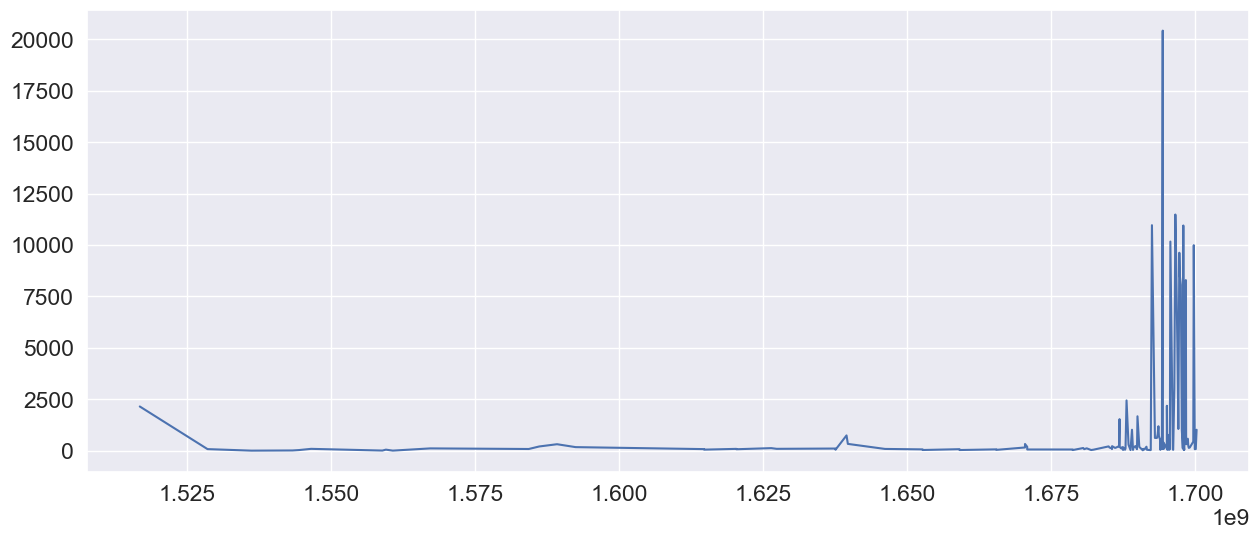

In [12]:
# Biểu đồ biểu thị tần xuất react của bài viết từ xưa đến hiện tại
plt.figure(figsize=(15, 6))
plt.plot(dates,y)
plt.show()


In [13]:
post_df_full1['reactions']

0      {'thích': 837, 'yêu thích': 87, 'haha': 11, 'w...
1                          {'thích': 75, 'yêu thích': 2}
2                                          {'thích': 70}
3      {'thích': 8654, 'yêu thích': 615, 'haha': 30, ...
4      {'thích': 335, 'yêu thích': 48, 'haha': 3, 'wo...
                             ...                        
128         {'thích': 18, 'yêu thích': 11, 'phẫn nộ': 1}
129                           {'thích': 9, 'phẫn nộ': 1}
130                                         {'thích': 1}
131            {'thích': 64, 'yêu thích': 10, 'haha': 1}
132    {'thích': 2014, 'yêu thích': 55, 'haha': 76, '...
Name: reactions, Length: 133, dtype: object

In [14]:
post_df_full1['reactions'] = post_df_full1['reactions'].apply(lambda x : dict(eval(x)) )
post_df_full_reactions = post_df_full1['reactions'].apply(pd.Series )

/var/folders/hw/3fmvf1y96hv_gfj7yxwtz2n40000gn/T/ipykernel_58669/1215674110.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  post_df_full1['reactions'] = post_df_full1['reactions'].apply(lambda x : dict(eval(x)) )
/var/folders/hw/3fmvf1y96hv_gfj7yxwtz2n40000gn/T/ipykernel_58669/1215674110.py:2: FutureWarning: Returning a DataFrame from Series.apply when the supplied function returns a Series is deprecated and will be removed in a future version.
  post_df_full_reactions = post_df_full1['reactions'].apply(pd.Series )


In [15]:
print(post_df_full1.columns)

Index(['post_id', 'reactions'], dtype='object')


In [16]:
post_df_full1[['post_text', 'shares', 'comments', 'reaction_count','time']] = raw_df[['post_text', 'shares', 'comments', 'reaction_count','time']]

/var/folders/hw/3fmvf1y96hv_gfj7yxwtz2n40000gn/T/ipykernel_58669/655946287.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  post_df_full1[['post_text', 'shares', 'comments', 'reaction_count','time']] = raw_df[['post_text', 'shares', 'comments', 'reaction_count','time']]
/var/folders/hw/3fmvf1y96hv_gfj7yxwtz2n40000gn/T/ipykernel_58669/655946287.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  post_df_full1[['post_text', 'shares', 'comments', 'reaction_count','time']] = raw_df[['post_text', 'shares', 'c

In [17]:
# gộp các cột lại vào dataframe
post_df_full_with_reactions = pd.concat([post_df_full1, post_df_full_reactions], axis=1).drop('reactions', axis=1)
post_df_full_with_reactions[['post_text','thích','yêu thích','haha','wow','buồn','phẫn nộ','thương thương',
                             'shares','comments','reaction_count']]

post_text   thích  yêu thích  \
0    MỞ RỘNG THỂ LỆ CHƠI MINIGAME:\nCHƠI CỰC DỄ, QU...   837.0       87.0   
1    🎉 BÙNG NỔ TRẢI NGHIỆM TẠI SỰ KIỆN SIÊU HOT:\n⚡...    75.0        2.0   
2    Diana Supernight - “Chiến thần khoá dâu” dù nà...    70.0        NaN   
3    Dù ít hay nhiều, đêm nào cũng phiêu!\n\nĐêm dâ...  8654.0      615.0   
4    NHẬP HỘI REVIEW NGƯỢC\nTRÚNG SIÊU PHẨM LIỀN TA...   335.0       48.0   
..                                                 ...     ...        ...   
128  Diana xin gửi lời cảm ơn chân thành tới hàng n...    18.0       11.0   
129                                           Không có     9.0        NaN   
130  🙌 Không hổ danh là cặp đôi “lầy lội” nhất show...     1.0        NaN   
131                                           Không có    64.0       10.0   
132  BẢO VỆ VƯỢT TRỘI, KHÁNG KHUẨN THOÁNG SẠCH DA\n...  2014.0       55.0   

     haha    wow  buồn  phẫn nộ  thương thương  shares  comments  \
0    11.0   34.0   1.0      1.0           46.0      54        31   
1     NaN    NaN   NaN      NaN            NaN       3         1   
2     NaN    NaN   NaN      NaN            NaN       0        11   
3    30.0  317.0  10.0     10.0          354.0     198       635   
4     3.0   28.0   2.0      NaN           24.0      46        32   
..    ...    ...   ...      ...            ...     ...       ...   
128   NaN    NaN   NaN      1.0            NaN       0        19   
129   NaN    NaN   NaN      1.0            NaN      12         6   
130   NaN    NaN   NaN      NaN            NaN       0         0   
131   1.0    NaN   NaN      NaN            NaN       0         0   
132  76.0    3.0   NaN      NaN            NaN       9        68   

     reaction_count  
0              1017  
1                77  
2                70  
3              9990  
4               440  
..              ...  
128              30  
129              10  
130               1  
131              75  
132            2148  

[133 rows x 11 columns]

In [18]:
# thay thế những giá trị Nan thành 0
for i in range(0, len(post_df_full_with_reactions['thích'].values), 1):
    if pd.isna(post_df_full_with_reactions['thích'].values[i]):
        post_df_full_with_reactions['thích'].values[i] = 0

    if pd.isna(post_df_full_with_reactions['yêu thích'].values[i]):
        post_df_full_with_reactions['yêu thích'].values[i] = 0

    if pd.isna(post_df_full_with_reactions['haha'].values[i]):
        post_df_full_with_reactions['haha'].values[i] = 0

    if pd.isna(post_df_full_with_reactions['wow'].values[i]):
        post_df_full_with_reactions['wow'].values[i] = 0

    if pd.isna(post_df_full_with_reactions['buồn'].values[i]):
        post_df_full_with_reactions['buồn'].values[i] = 0

    if pd.isna(post_df_full_with_reactions['phẫn nộ'].values[i]):
        post_df_full_with_reactions['phẫn nộ'].values[i] = 0

    if pd.isna(post_df_full_with_reactions['thương thương'].values[i]):
        post_df_full_with_reactions['thương thương'].values[i] = 0

    if pd.isna(post_df_full_with_reactions['shares'].values[i]):
        post_df_full_with_reactions['shares'].values[i] = 0
    
    if pd.isna(post_df_full_with_reactions['comments'].values[i]):
        post_df_full_with_reactions['comments'].values[i] = 0

post_df_full_with_reactions[['post_text','thích','yêu thích','haha','wow','buồn','phẫn nộ','thương thương',
                                 'shares','comments','reaction_count']]

post_text   thích  yêu thích  \
0    MỞ RỘNG THỂ LỆ CHƠI MINIGAME:\nCHƠI CỰC DỄ, QU...   837.0       87.0   
1    🎉 BÙNG NỔ TRẢI NGHIỆM TẠI SỰ KIỆN SIÊU HOT:\n⚡...    75.0        2.0   
2    Diana Supernight - “Chiến thần khoá dâu” dù nà...    70.0        0.0   
3    Dù ít hay nhiều, đêm nào cũng phiêu!\n\nĐêm dâ...  8654.0      615.0   
4    NHẬP HỘI REVIEW NGƯỢC\nTRÚNG SIÊU PHẨM LIỀN TA...   335.0       48.0   
..                                                 ...     ...        ...   
128  Diana xin gửi lời cảm ơn chân thành tới hàng n...    18.0       11.0   
129                                           Không có     9.0        0.0   
130  🙌 Không hổ danh là cặp đôi “lầy lội” nhất show...     1.0        0.0   
131                                           Không có    64.0       10.0   
132  BẢO VỆ VƯỢT TRỘI, KHÁNG KHUẨN THOÁNG SẠCH DA\n...  2014.0       55.0   

     haha    wow  buồn  phẫn nộ  thương thương  shares  comments  \
0    11.0   34.0   1.0      1.0           46.0      54        31   
1     0.0    0.0   0.0      0.0            0.0       3         1   
2     0.0    0.0   0.0      0.0            0.0       0        11   
3    30.0  317.0  10.0     10.0          354.0     198       635   
4     3.0   28.0   2.0      0.0           24.0      46        32   
..    ...    ...   ...      ...            ...     ...       ...   
128   0.0    0.0   0.0      1.0            0.0       0        19   
129   0.0    0.0   0.0      1.0            0.0      12         6   
130   0.0    0.0   0.0      0.0            0.0       0         0   
131   1.0    0.0   0.0      0.0            0.0       0         0   
132  76.0    3.0   0.0      0.0            0.0       9        68   

     reaction_count  
0              1017  
1                77  
2                70  
3              9990  
4               440  
..              ...  
128              30  
129              10  
130               1  
131              75  
132            2148  

[133 rows x 11 columns]

In [19]:
post_df_full_with_reactions.columns

Index(['post_id', 'post_text', 'shares', 'comments', 'reaction_count', 'time',
       'thích', 'yêu thích', 'haha', 'wow', 'thương thương', 'buồn',
       'phẫn nộ'],
      dtype='object')

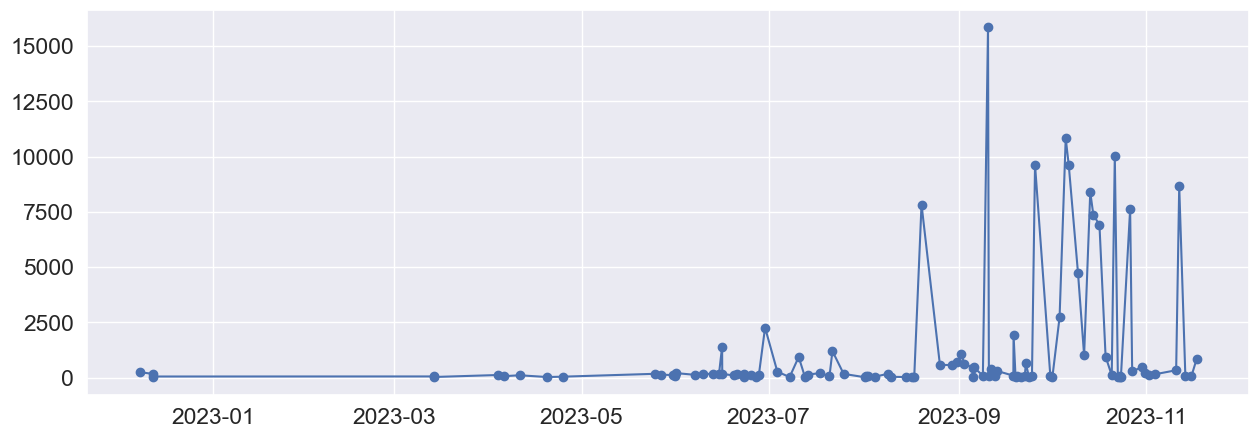

In [88]:
plt.plot(post_df_full_with_reactions['thích'].head(100), linestyle = '-', marker = 'o')


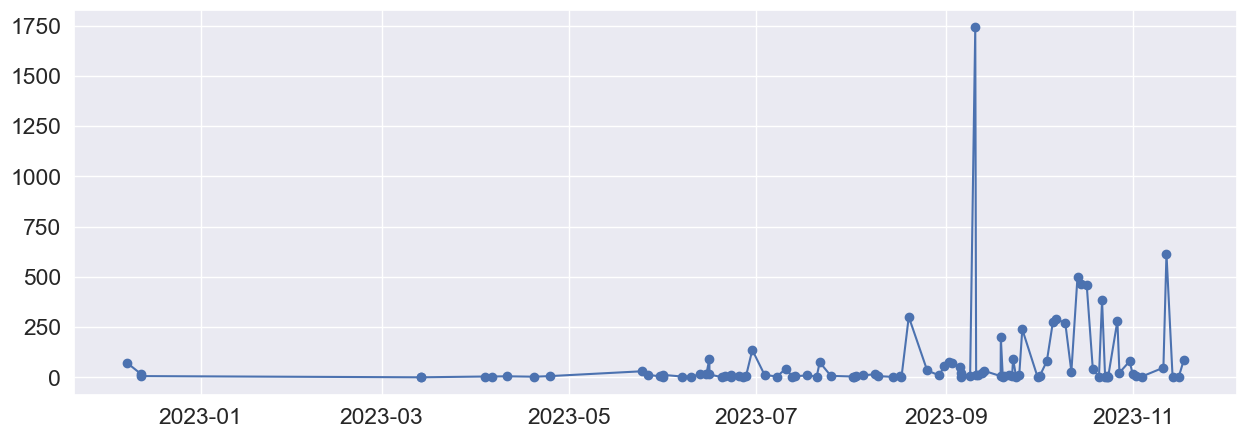

In [87]:
plt.plot(post_df_full_with_reactions['yêu thích'].head(100), linestyle = '-', marker = 'o')


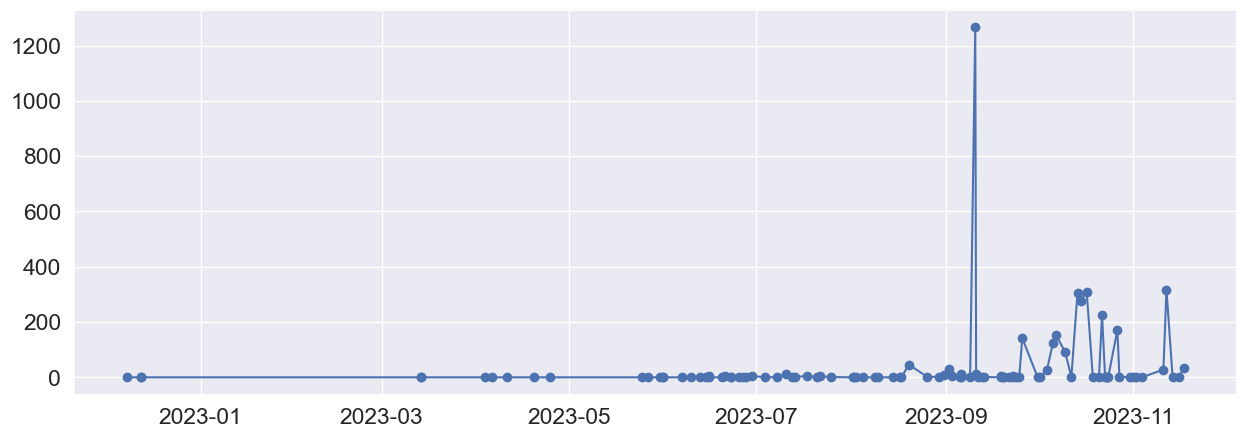

In [89]:
plt.plot(post_df_full_with_reactions['wow'].head(100), linestyle = '-', marker = 'o')


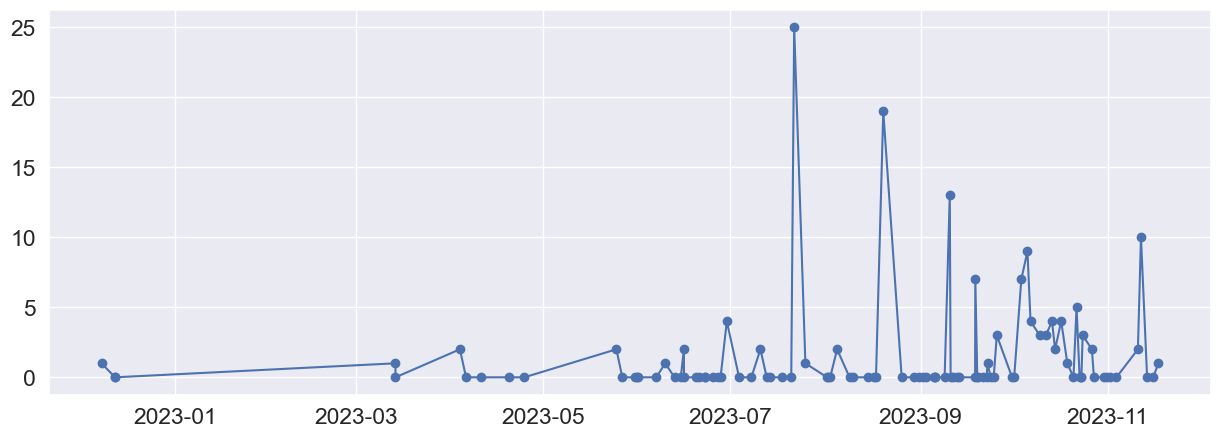

In [90]:
plt.plot(post_df_full_with_reactions['buồn'].head(100), linestyle = '-', marker = 'o')


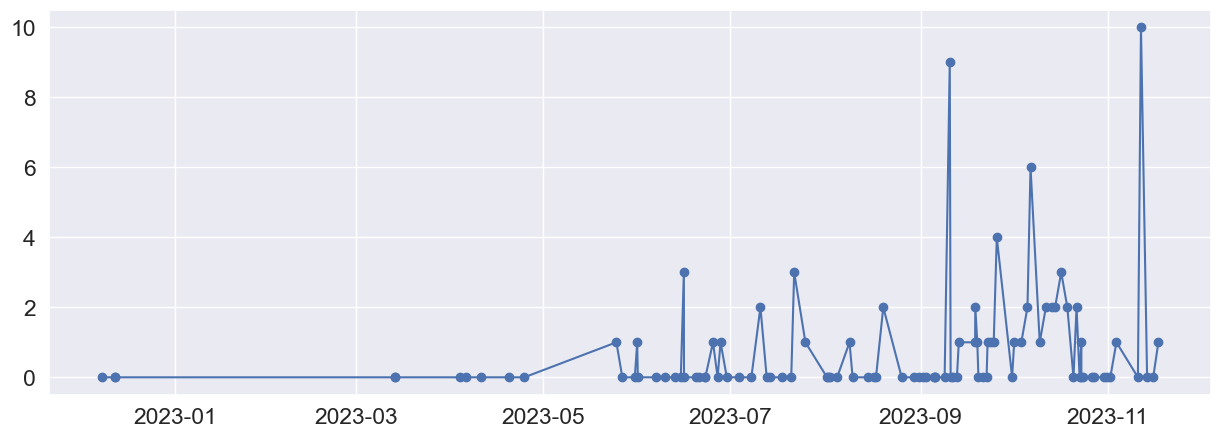

In [91]:
plt.plot(post_df_full_with_reactions['phẫn nộ'].head(100), linestyle = '-', marker = 'o')

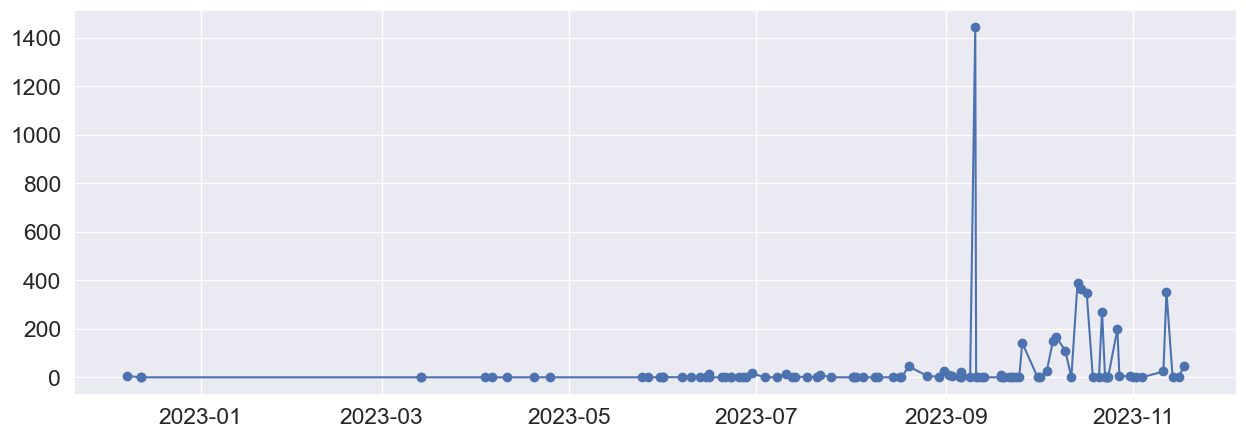

In [92]:
plt.plot(post_df_full_with_reactions['thương thương'].head(100), linestyle = '-', marker = 'o')

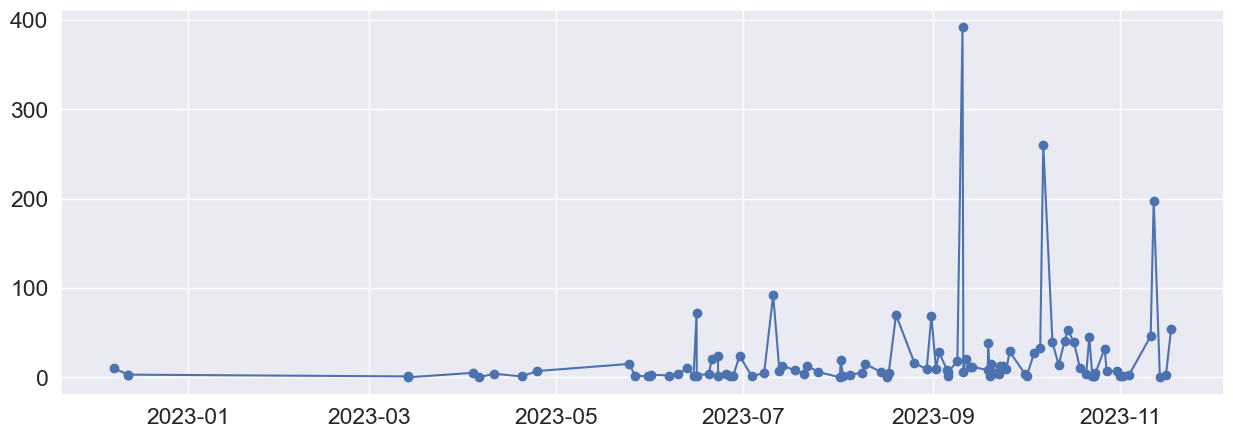

In [93]:
plt.plot(post_df_full_with_reactions['shares'].head(100), linestyle = '-', marker = 'o')

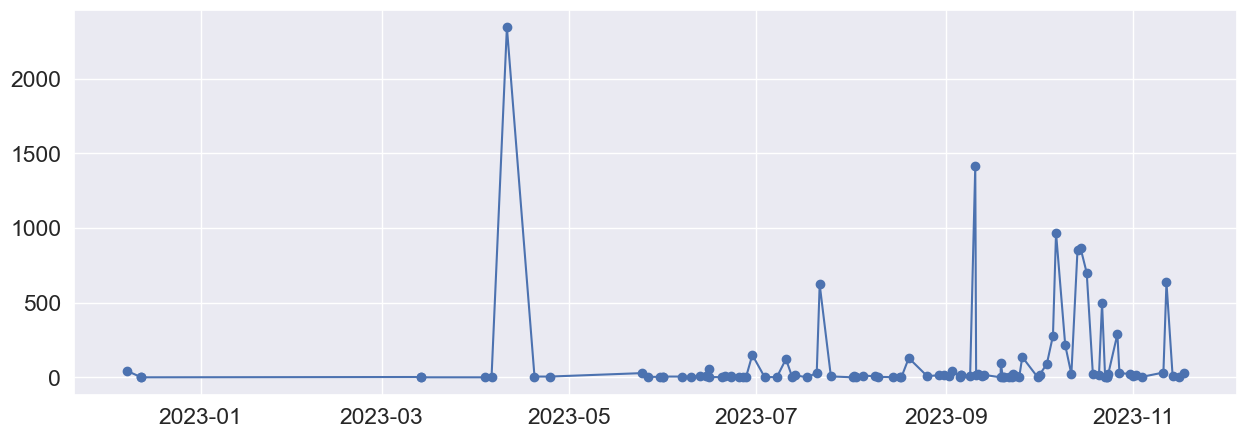

In [94]:
plt.plot(post_df_full_with_reactions['comments'].head(100), linestyle = '-', marker = 'o')

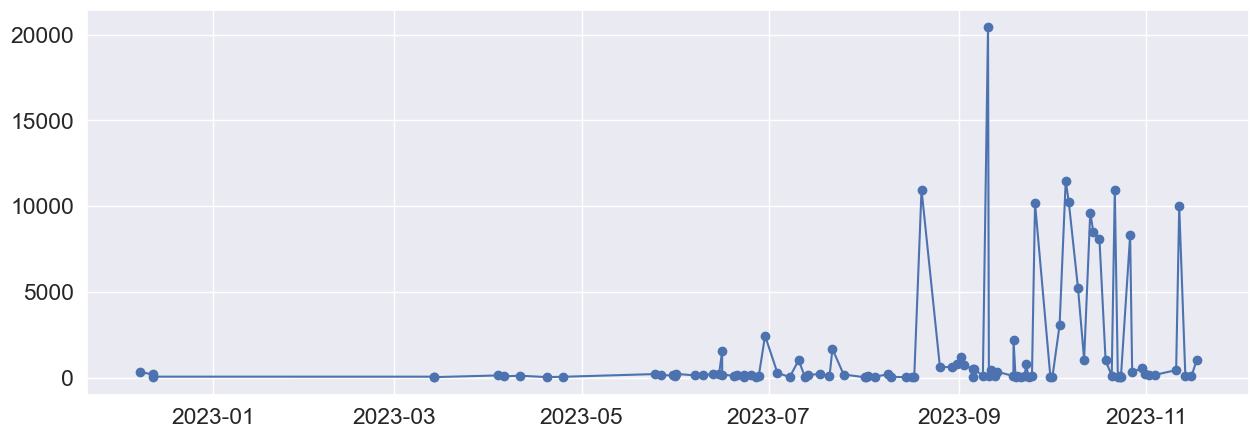

In [95]:
plt.plot(post_df_full_with_reactions['reaction_count'].head(100), linestyle = '-', marker = 'o')

In [20]:
import matplotlib.pyplot as plt
from matplotlib.dates import DateFormatter, YearLocator
import matplotlib.dates as mdates
import pandas as pd
from datetime import datetime
from matplotlib.dates import DateFormatter, MonthLocator, YearLocator

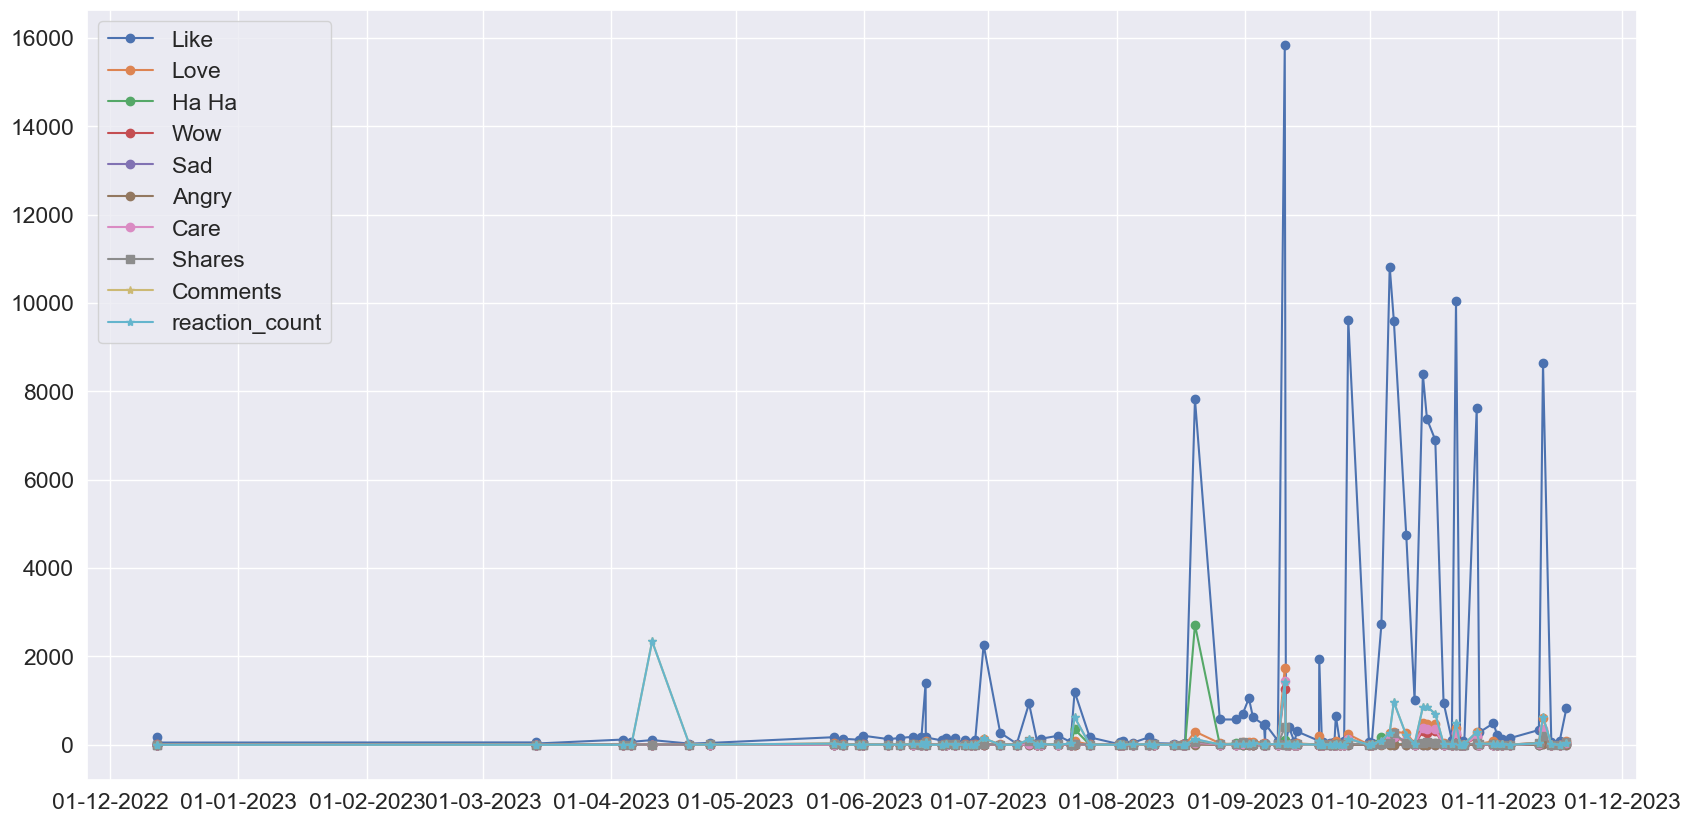

In [21]:
# biểu đồ tổng quát recations từ 2022 đến 2023
fig, ax = plt.subplots(figsize=(20, 10))
post_df_full_with_reactions['time'] = pd.to_datetime(post_df_full_with_reactions['time'])
post_df_full_with_reactionss = post_df_full_with_reactions.loc[0:98]
ax.plot(post_df_full_with_reactionss['time'], post_df_full_with_reactionss['thích'], label = "Like", marker="o")
ax.plot(post_df_full_with_reactionss['time'], post_df_full_with_reactionss['yêu thích'], label = "Love", marker="o")
ax.plot(post_df_full_with_reactionss['time'], post_df_full_with_reactionss['haha'], label = "Ha Ha", marker="o")
ax.plot(post_df_full_with_reactionss['time'], post_df_full_with_reactionss['wow'], label = "Wow", marker="o")
ax.plot(post_df_full_with_reactionss['time'], post_df_full_with_reactionss['buồn'], label = "Sad", marker="o")
ax.plot(post_df_full_with_reactionss['time'], post_df_full_with_reactionss['phẫn nộ'], label = "Angry", marker="o")
ax.plot(post_df_full_with_reactionss['time'], post_df_full_with_reactionss['thương thương'], label = "Care", marker="o")
ax.plot(post_df_full_with_reactionss['time'], post_df_full_with_reactionss['shares'], label = "Shares", marker="s")
ax.plot(post_df_full_with_reactionss['time'], post_df_full_with_reactionss['comments'], label = "Comments", marker="*")
ax.plot(post_df_full_with_reactionss['time'], post_df_full_with_reactionss['comments'], label = "reaction_count", marker="*")

plt.legend()
from matplotlib.dates import DateFormatter
#locator = MonthLocator(bymonthday=[1, 6, 12])
#ax.xaxis.set_major_locator(mdates.locator)
selected_dates = [ datetime(2023, 1, 1), datetime(2023, 2, 1),datetime(2023, 3, 1),datetime(2023, 4, 1),datetime(2023, 5, 1),
datetime(2023, 6, 1),datetime(2023, 7, 1),datetime(2023, 8, 1),datetime(2023, 9, 1),datetime(2023, 10, 1),datetime(2023, 11, 1), datetime(2023, 12, 1)]
locator = MonthLocator(bymonth=[date.month for date in selected_dates], interval=1)
ax.xaxis.set_major_locator(locator)
ax.xaxis.set_major_formatter(DateFormatter('%d-%m-%Y'))


In [22]:
# hiện thị sự tương quan của các biểu tượng cảm xúc với share
post_df_full_with_reactions[['thích','yêu thích','haha','wow','buồn','phẫn nộ','thương thương']].corrwith(post_df_full_with_reactions['shares'])


thích            0.740564
yêu thích        0.848619
haha             0.136544
wow              0.825919
buồn             0.487767
phẫn nộ          0.381536
thương thương    0.819808
dtype: float64

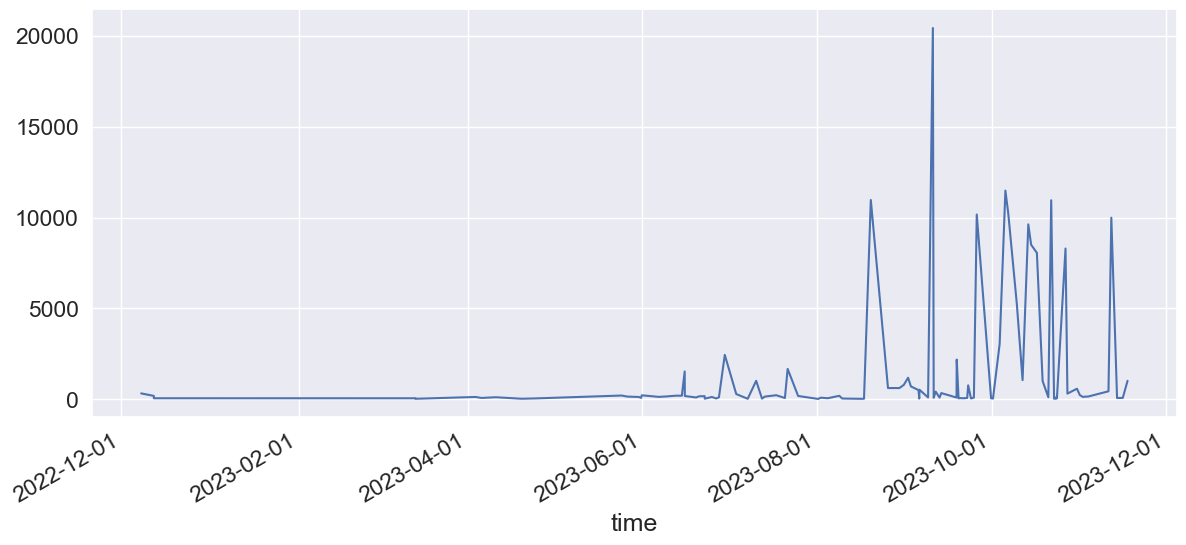

In [23]:
post_df_full_with_reactions.set_index('time', inplace=True)

plt.figure(facecolor='None')
reactions_2022_2023 = post_df_full_with_reactions[0:100]
reactions_2022_2023['reaction_count'].plot(kind='line', figsize=(14, 6))

plt.gca().xaxis.set_major_formatter(DateFormatter('%Y-%m-%d'))
plt.gca().xaxis.set_major_locator(MonthLocator(bymonth=[2,4,6,8,10 ,12]))


## Phân tích bài viết trên page

In [57]:
# bài viết có lượt tương tác cao
post_textt = raw_df[['post_text','reaction_count']]
maxx = post_textt['reaction_count'].max()
post_reac_max = post_textt[post_textt['reaction_count'] == maxx]
print('Số lượt tương tác: ',post_reac_max['reaction_count'].iloc[0])
print(post_reac_max['post_text'].iloc[0])

Số lượt tương tác:  20423
️🎉️🎉CUỘC THI SÁNG TẠO VIDEO CAPCUT: SAFE COOL MATCH CHALLENGE️🎉️🎉

⏰ Từ 10/09 - 28/09/2023
📸 Khoe ngay những clip sáng tạo trong thử thách “Safe Cool Match Challenge” do Diana Cool Fresh tổ chức để nhận về những giải thưởng cực giá trị nhé các bạn ơi!!!

✨ 01 GIẢI NHẤT: Máy tính bảng iPad Pro M2 11" Wi-Fi (128GB)
✨ 02 GIẢI NHÌ: Apple Watch SE 44mm LTE 2022
✨ 03 GIẢI BA: Máy ảnh Fujifilm Instax Camera Mini 12
✨20 GIẢI KHUYẾN KHÍCH: Cặp vé xem phim CGV

👉 CHƠI CỰC DỄ - Chỉ với 4 bước đơn giản nè:
❄ Bước 1: Like Fanpage Diana Vietnam
❄ Bước 2: Sử dụng template có sẵn: bit.ly/SafeCoolMatch, upload ít nhất 05 hình ảnh “cool” nhất của bạn để sáng tạo video dự thi
❄ Bước 3: Đăng tải video lên Facebook hoặc Tiktok cá nhân ở chế độ công khai kèm hashtag #DianaCoolFresh #Antoàntựnhiên #SafeCoolMatch
❄ Bước 4: Gửi bài dự thi đến BTC bằng cách comment link video ngay dưới post này và kêu gọi like, comment để bình chọn
Lưu ý: Video đúng thể lệ là video thực hiện đủ 04 bước

In [58]:
# bài viết có lượt tương tác cao
post_textt = raw_df[['post_text','reaction_count']]
minn = post_textt['reaction_count'].min()
post_reac_min = post_textt[post_textt['reaction_count'] == minn]
print('Số lượt tương tác: ',post_reac_min['reaction_count'].iloc[0])
print(post_reac_min['post_text'].iloc[0])

Số lượt tương tác:  1
🙌 Không hổ danh là cặp đôi “lầy lội” nhất showbiz Việt, Khởi My và Kelvin Khánh đã mang đến cho các fans Cần Thơ một party tuyệt vời ông mặt trời💥
Cùng nhìn lại những khoảnh khắc đáng nhớ tối 2/9 vừa qua và chờXem thêm đón thêm thật nhiều sự kiện siêu “cool” khác từ Diana nhé con gái <3

#Diana #YêuTinHànhĐộng #LàConGáiThậtTuyệt #CầnThơEvent #KhởiMy #KelvinKhánh


In [24]:
df_text = raw_df[['post_id','post_text']]
text    = str(df_text['post_text'])

df_text

post_id                                          post_text
0     742421974590977  MỞ RỘNG THỂ LỆ CHƠI MINIGAME:\nCHƠI CỰC DỄ, QU...
1     741406738025834  🎉 BÙNG NỔ TRẢI NGHIỆM TẠI SỰ KIỆN SIÊU HOT:\n⚡...
2     740296728136835  Diana Supernight - “Chiến thần khoá dâu” dù nà...
3     738655024967672  Dù ít hay nhiều, đêm nào cũng phiêu!\n\nĐêm dâ...
4     738561371643704  NHẬP HỘI REVIEW NGƯỢC\nTRÚNG SIÊU PHẨM LIỀN TA...
..                ...                                                ...
128  2073620249348194  Diana xin gửi lời cảm ơn chân thành tới hàng n...
129  2053936201316599                                           Không có
130  1945062585537295  🙌 Không hổ danh là cặp đôi “lầy lội” nhất show...
131  1811106235599598                                           Không có
132  1669099749800248  BẢO VỆ VƯỢT TRỘI, KHÁNG KHUẨN THOÁNG SẠCH DA\n...

[133 rows x 2 columns]

In [35]:
import re
# xoá icon trong văn bản
def remove_icons_keep_words_with_accents(text):
    text_no_icons = re.sub(r'[^\w\s]', '', text)
    
    words = text_no_icons.split()

    words_with_accents = [word for word in words if any(char for char in word if char.isalpha() and char.isascii() == False)]
    
    result_text = ' '.join(words_with_accents)
    
    return result_text
text = remove_icons_keep_words_with_accents(text)

In [36]:
text

'MỞ RỘNG THỂ LỆ CHƠI CHƠI CỰC DỄ QUÀ CỰC MÊ HÓT HÒN HỌT quyết định chơi lớn rộng thể lệ chiến thần dàng tạo phá đảo quà siêu phẩm nè ơi đổi nàng nắm ngược thể lệ gốc thể TỰ riêng tạo quà Hình ảnh đính kèm KHÔNG BẮT BUỘC sản phẩm Hoạt Tính nàng dáng cực sức giật giải mách hình sản phẩm cộng Các nàng thực hiện Bước Bước Đăng tải đăng chế độ công cá nhân hình ảnh kèm nội sản phẩm Hoạt Tính Bước Chụp màn hình đăng bình luận đăng này kèm mắn Quá mình nàng sẵn sàng quà đỉnh Từ siêu phẩm bình Hồng Đen bự sử dụng Hoạt Tính miễn phí Quà khủng cỡ nhập hội dế xịn chẳng đợi tiết thể lệ cập nhật BÙNG NỔ TRẢI NGHIỆM TẠI SỰ KIỆN SIÊU TRẠM CÔNG NGHỆ VÔ CỰC HOẠT TÍNH Sự kiện trải nghiệm công nghệ vô cực Hoạt Tính đổ trạm siêu khủng Trạm Hồ Chí Từ Trạm Hà Nội Từ Hà Đông Thời Từ Quẩy kiện thả trải nghiệm Đắm độ kết hợp công nghệ năng vô cực siêu hoành tráng hồ chiêm ngưỡng hình Sống ảo cực quà yêu cổng Khám phá trò hấp dẫn quà sành điệu ĐẶC BIỆT Chơi nhiều hội quà khủng vòng mắn Từ quà giá trị máy sấy tó

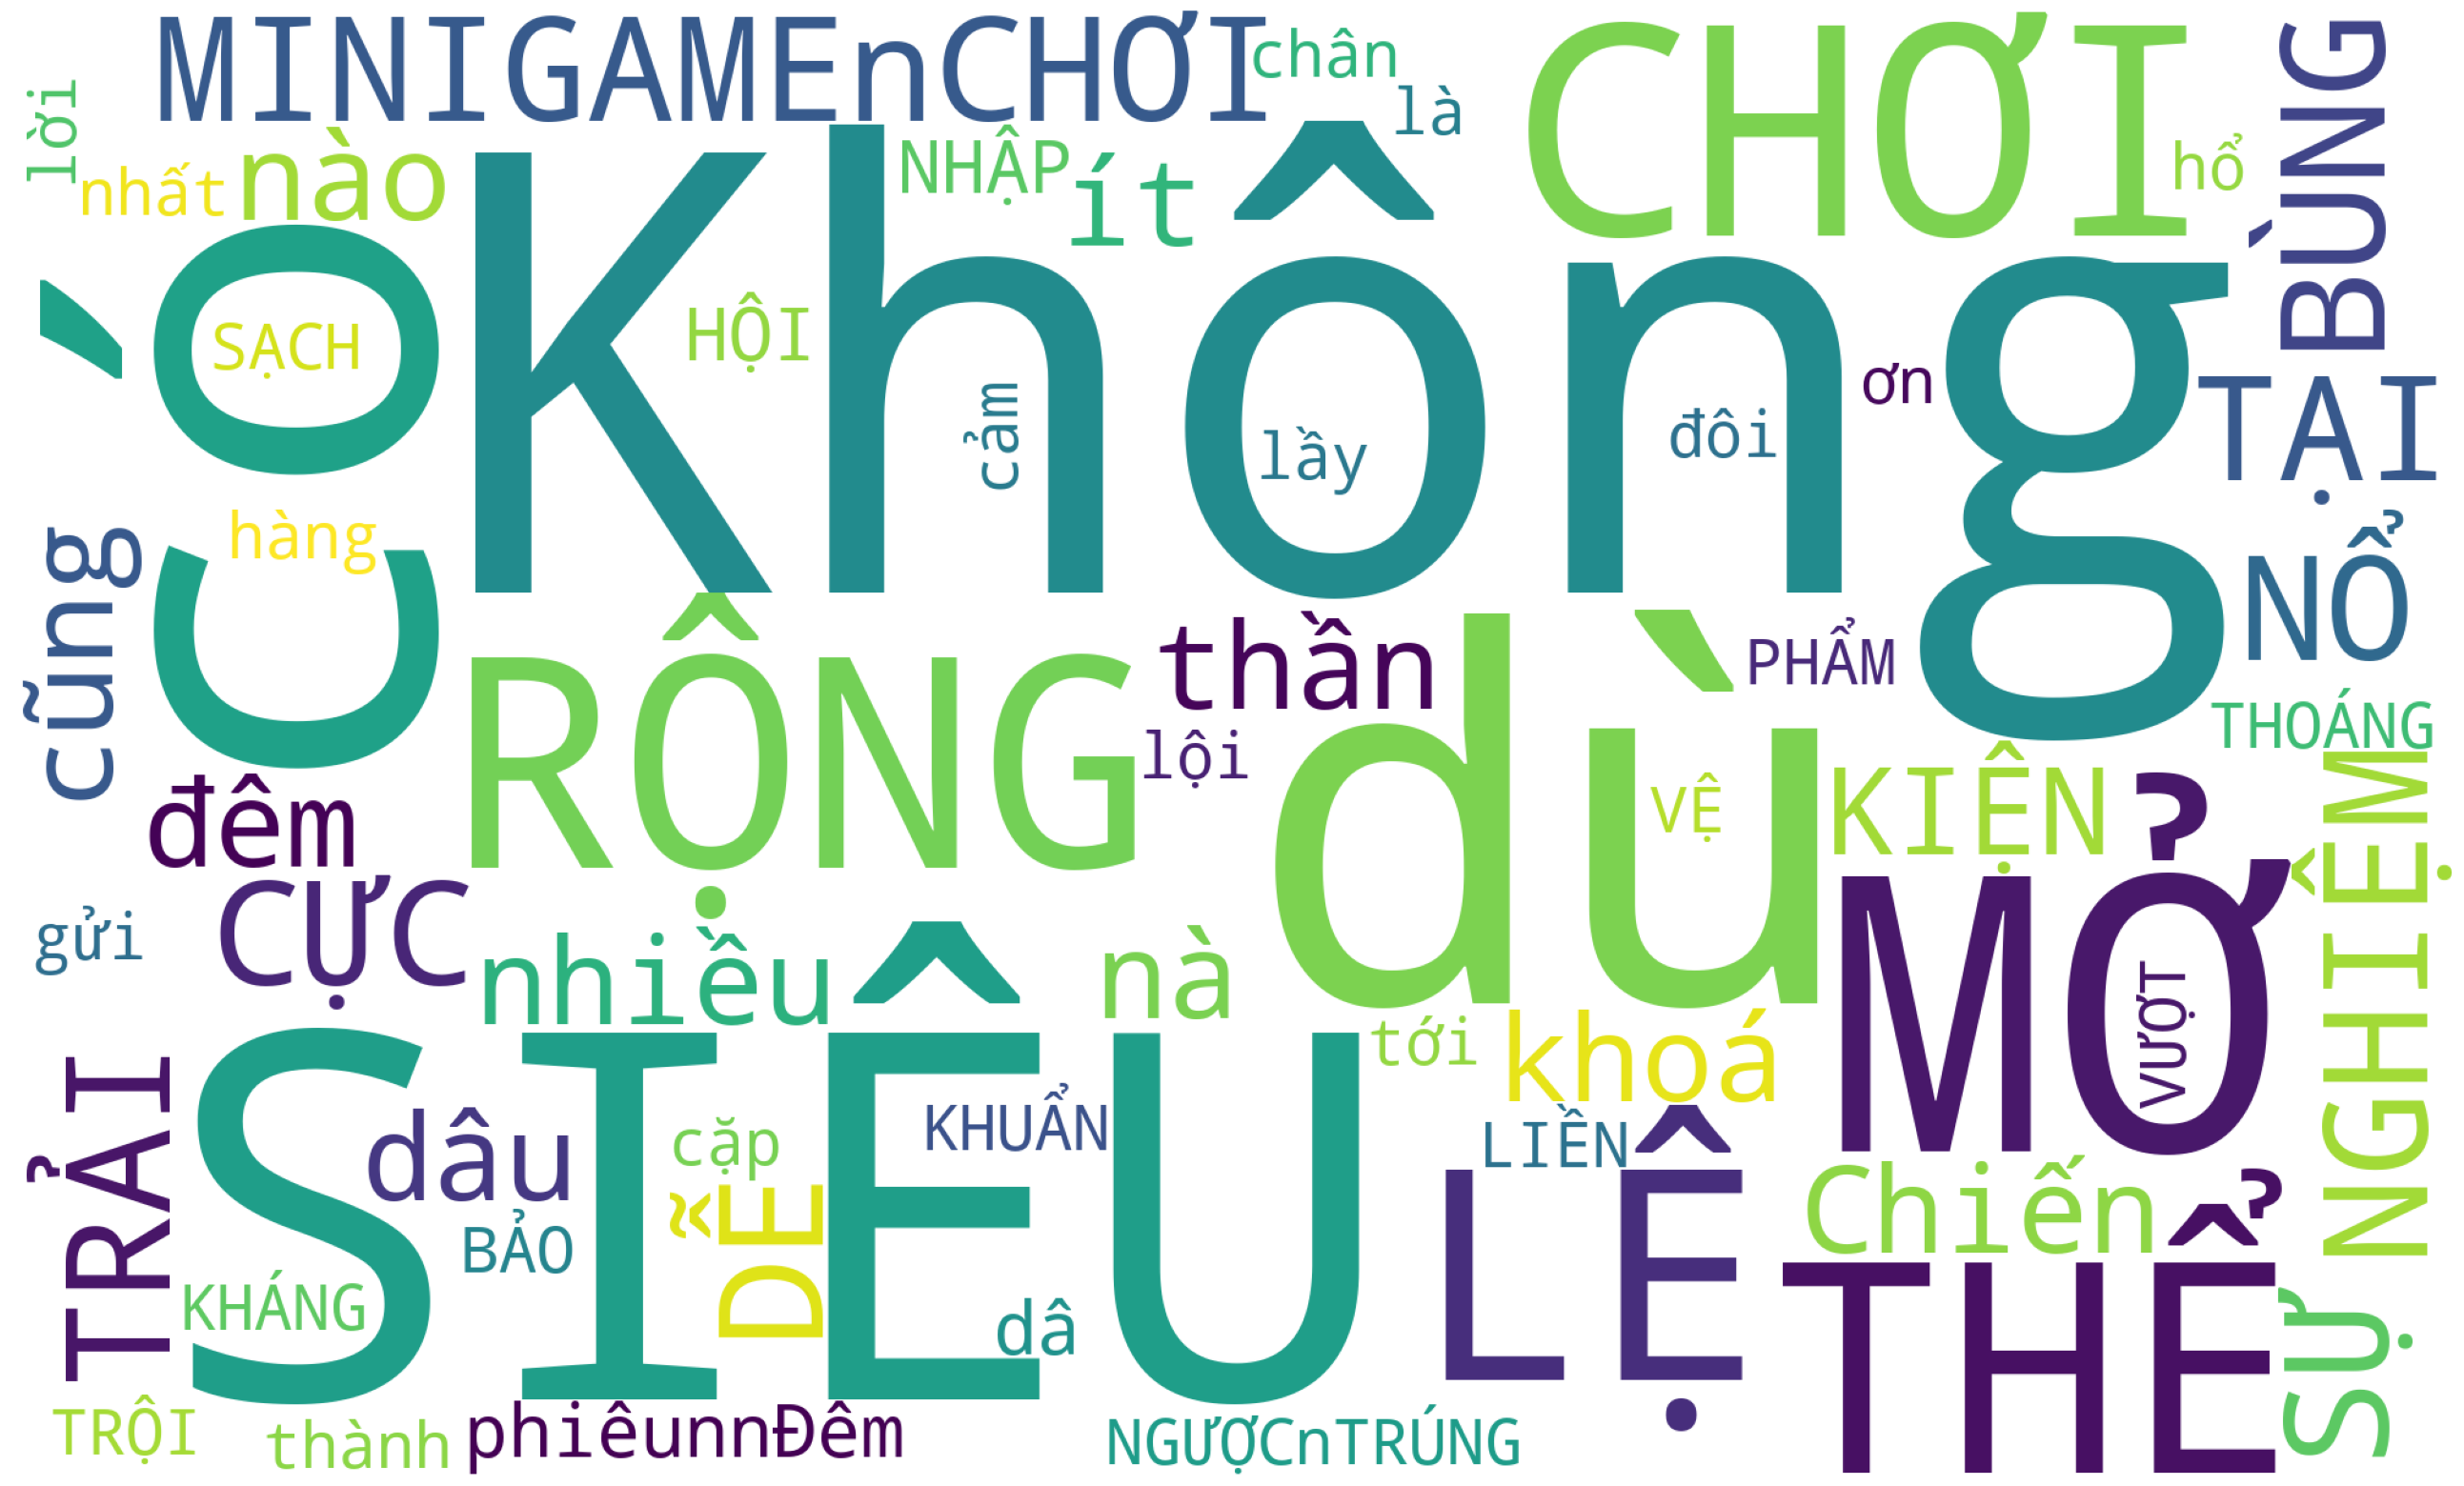

In [26]:
# những từ hay xuất hiện nhiều nhất khi chưa bỏ stop_word
from wordcloud import WordCloud, STOPWORDS

wordcloud = WordCloud(stopwords=STOPWORDS,
                          background_color='white', 
                      max_words=300,
                      width=2000, height=1200
                         ).generate(text)
plt.figure(figsize=(40,20))
plt.clf()
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

In [27]:
stop_words = []
with open('Data/vietnamese-stopwords.txt', 'r') as file:
    for line in file:
        stop_words.append(line.strip())
print(stop_words)

['a lô', 'a ha', 'ai', 'ai ai', 'ai nấy', 'ai đó', 'alô', 'amen', 'anh', 'anh ấy', 'ba', 'ba ba', 'ba bản', 'ba cùng', 'ba họ', 'ba ngày', 'ba ngôi', 'ba tăng', 'bao giờ', 'bao lâu', 'bao nhiêu', 'bao nả', 'bay biến', 'biết', 'biết bao', 'biết bao nhiêu', 'biết chắc', 'biết chừng nào', 'biết mình', 'biết mấy', 'biết thế', 'biết trước', 'biết việc', 'biết đâu', 'biết đâu chừng', 'biết đâu đấy', 'biết được', 'buổi', 'buổi làm', 'buổi mới', 'buổi ngày', 'buổi sớm', 'bà', 'bà ấy', 'bài', 'bài bác', 'bài bỏ', 'bài cái', 'bác', 'bán', 'bán cấp', 'bán dạ', 'bán thế', 'bây bẩy', 'bây chừ', 'bây giờ', 'bây nhiêu', 'bèn', 'béng', 'bên', 'bên bị', 'bên có', 'bên cạnh', 'bông', 'bước', 'bước khỏi', 'bước tới', 'bước đi', 'bạn', 'bản', 'bản bộ', 'bản riêng', 'bản thân', 'bản ý', 'bất chợt', 'bất cứ', 'bất giác', 'bất kì', 'bất kể', 'bất kỳ', 'bất luận', 'bất ngờ', 'bất nhược', 'bất quá', 'bất quá chỉ', 'bất thình lình', 'bất tử', 'bất đồ', 'bấy', 'bấy chầy', 'bấy chừ', 'bấy giờ', 'bấy lâu', 'bấy lâ

In [28]:
sentence_list = raw_df['post_text'].tolist()
for i in range(len(sentence_list)):
  sentence_list[i] = " ".join([word for word in sentence_list[i].split() if word not in stop_words])
text = str(sentence_list)

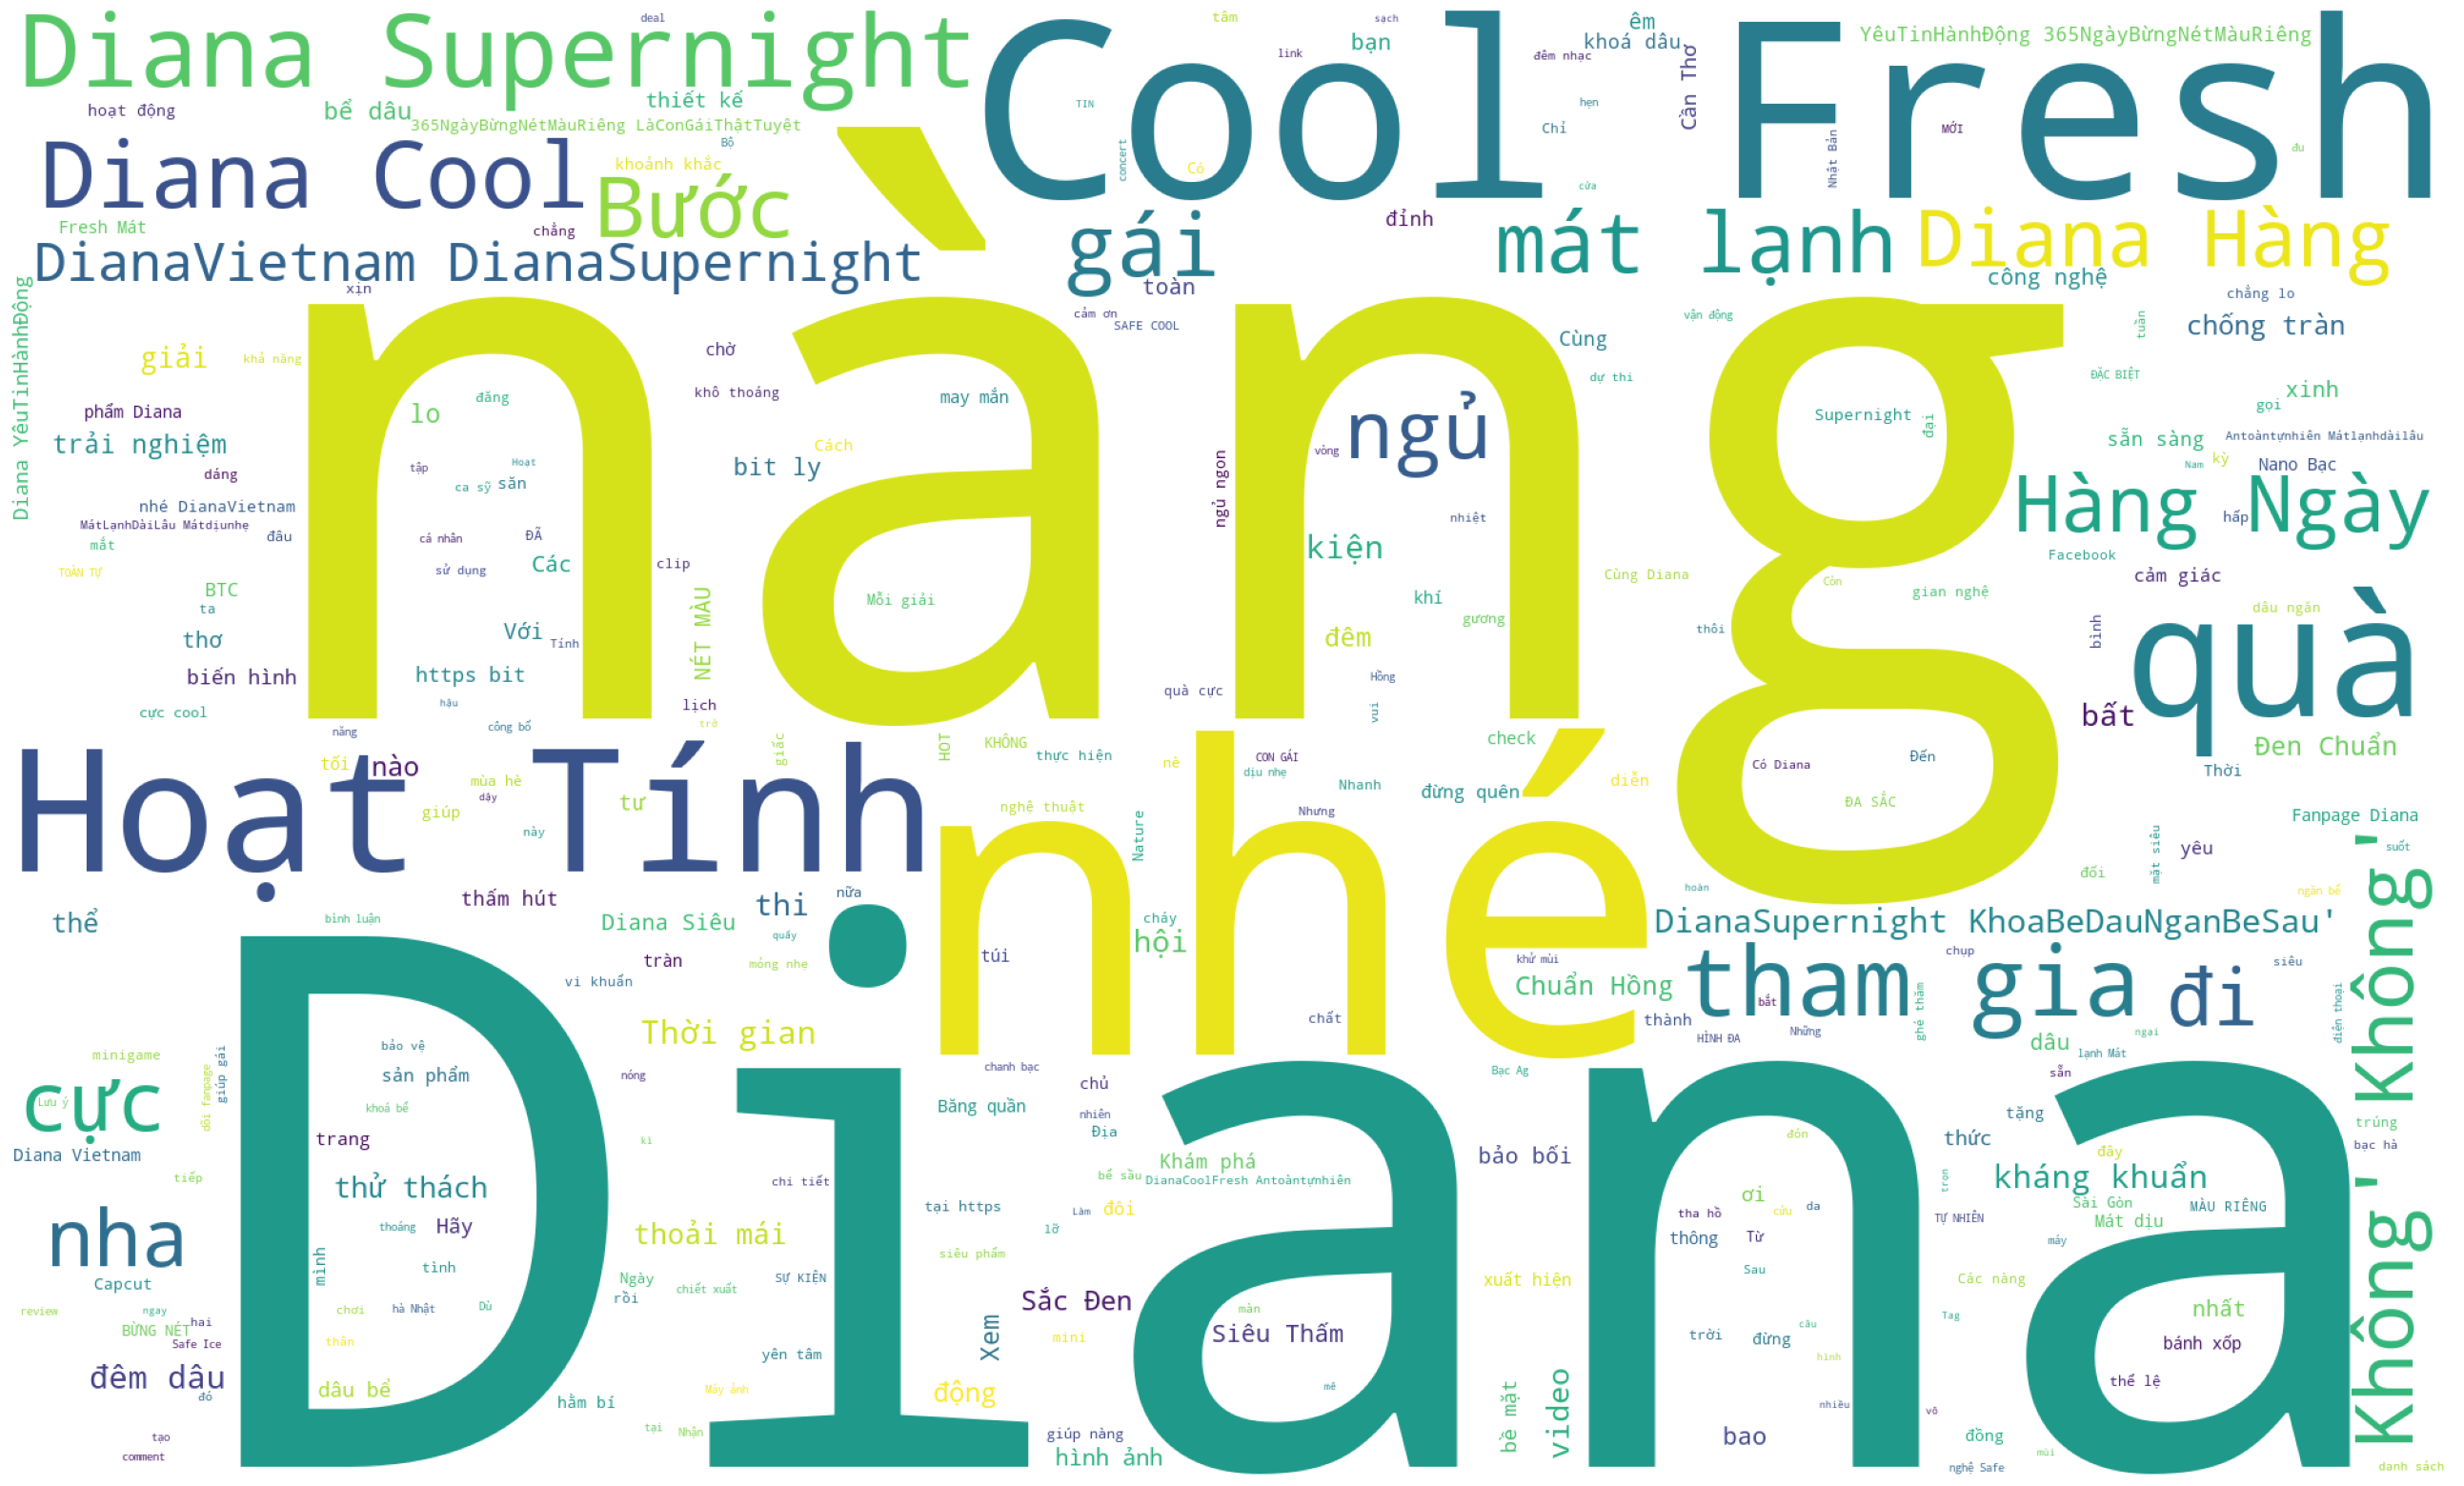

In [29]:
# những từ hay xuất hiện nhiều nhất sao khi đã loại bỏ stop_word
from wordcloud import WordCloud, STOPWORDS

wordcloud = WordCloud(stopwords=STOPWORDS,
                          background_color='white', 
                      max_words=300,
                      width=2000, height=1200
                         ).generate(text)
plt.figure(figsize=(40,20))
plt.clf()
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

In [37]:
# tính TF của từng từ
tf_score = {}
text_list = text.split()
for each_word in text_list:
    each_word = each_word.replace('.','')
    if each_word not in stop_words:
        if each_word in tf_score:
            tf_score[each_word] += 1
        else:
            tf_score[each_word] = 1
tf_score


{'MỞ': 1,
 'RỘNG': 1,
 'THỂ': 1,
 'LỆ': 1,
 'CHƠI': 3,
 'CỰC': 13,
 'DỄ': 2,
 'QUÀ': 10,
 'MÊ': 1,
 'HÓT': 1,
 'HÒN': 1,
 'HỌT': 1,
 'quyết': 3,
 'định': 3,
 'rộng': 8,
 'thể': 33,
 'lệ': 12,
 'chiến': 4,
 'thần': 12,
 'dàng': 5,
 'phá': 16,
 'đảo': 2,
 'quà': 57,
 'siêu': 48,
 'phẩm': 20,
 'nè': 10,
 'đổi': 3,
 'nàng': 106,
 'nắm': 1,
 'ngược': 3,
 'gốc': 1,
 'TỰ': 11,
 'Hình': 4,
 'ảnh': 32,
 'đính': 1,
 'kèm': 8,
 'KHÔNG': 10,
 'BẮT': 2,
 'BUỘC': 1,
 'sản': 13,
 'Hoạt': 39,
 'Tính': 42,
 'dáng': 13,
 'cực': 49,
 'sức': 5,
 'giật': 1,
 'giải': 36,
 'mách': 2,
 'hình': 36,
 'cộng': 4,
 'Các': 22,
 'thực': 13,
 'hiện': 25,
 'Bước': 29,
 'Đăng': 4,
 'tải': 7,
 'đăng': 10,
 'chế': 6,
 'độ': 11,
 'công': 19,
 'cá': 11,
 'nhân': 10,
 'nội': 2,
 'Chụp': 2,
 'màn': 8,
 'bình': 16,
 'luận': 7,
 'mắn': 12,
 'Quá': 1,
 'sẵn': 16,
 'sàng': 12,
 'đỉnh': 12,
 'Từ': 12,
 'Hồng': 16,
 'Đen': 13,
 'bự': 4,
 'sử': 6,
 'dụng': 11,
 'miễn': 4,
 'phí': 4,
 'Quà': 3,
 'khủng': 3,
 'cỡ': 2,
 'nhập': 2,
 'h

In [39]:
import math
from collections import Counter

def calculate_idf(corpus):
    total_documents = len(corpus)
    word_count_in_documents = Counter()

    for document in corpus:
        unique_words = set(document.split())
        word_count_in_documents.update(unique_words)

    idf_scores = {}
    for word, count in word_count_in_documents.items():
        idf_scores[word] = math.log(total_documents / (count + 1))

    return idf_scores

corpus =  text.split()

idf_scores = calculate_idf(corpus)

for word, idf_score in idf_scores.items():
    print(f" {word} : {idf_score:.4f}")

 MỞ : 8.1693
 RỘNG : 8.1693
 THỂ : 8.1693
 LỆ : 8.1693
 CHƠI : 7.4762
 CỰC : 6.2234
 DỄ : 7.7639
 QUÀ : 6.4646
 MÊ : 8.1693
 HÓT : 8.1693
 HÒN : 8.1693
 HỌT : 8.1693
 quyết : 7.4762
 định : 7.4762
 chơi : 7.2530
 lớn : 8.1693
 rộng : 6.6653
 thể : 5.3361
 lệ : 6.2975
 chiến : 7.2530
 thần : 6.2975
 dàng : 7.0707
 tạo : 7.2530
 phá : 6.0293
 đảo : 7.7639
 quà : 4.8020
 siêu : 4.9707
 phẩm : 5.8180
 nè : 6.4646
 ơi : 5.7714
 đổi : 7.4762
 nàng : 4.1897
 nắm : 8.1693
 ngược : 7.4762
 gốc : 8.1693
 TỰ : 6.3776
 riêng : 8.1693
 Hình : 7.2530
 ảnh : 5.3660
 đính : 8.1693
 kèm : 6.6653
 KHÔNG : 6.4646
 BẮT : 7.7639
 BUỘC : 8.1693
 sản : 6.2234
 Hoạt : 5.1736
 Tính : 5.1013
 dáng : 6.2234
 cực : 4.9505
 sức : 7.0707
 giật : 8.1693
 giải : 5.2516
 mách : 7.7639
 hình : 5.2516
 cộng : 7.2530
 Các : 5.7270
 thực : 6.2234
 hiện : 5.6044
 Bước : 5.4613
 Đăng : 7.2530
 tải : 6.7830
 đăng : 6.4646
 chế : 6.9166
 độ : 6.3776
 công : 5.8668
 cá : 6.3776
 nhân : 6.4646
 nội : 7.7639
 Chụp : 7.7639
 màn 

In [40]:
# tính idf*tf của mỗi từ
value_tf = tf_score.values()
value_idf = idf_scores.values()
key_tfidf = tf_score.keys()
key_tfidf = list(key_tfidf)
value_idf = list(value_idf)
value_tf = list(value_tf)
values_tfidf = []
for i in range(len(tf_score)):
    values_tfidf.append(value_idf[i]*value_tf[i])
tfidf_score = dict(zip(key_tfidf, values_tfidf))



In [41]:
top_10_elements = sorted(tfidf_score.items(), key=lambda x: x[1], reverse=True)[:10]
top_10_elements


[('dâu', 784.1510000698424),
 ('nàng', 616.7038807090803),
 ('gái', 522.8375293394167),
 ('quà', 413.4236028510912),
 ('cực', 400.29748340049093),
 ('đêm', 357.1380792397302),
 ('bể', 318.3187228006291),
 ('động', 310.43478304527866),
 ('siêu', 289.40497115674157),
 ('ngủ', 284.8877654619568)]

Text(0, 0.5, 'Số lần được sử dụng')

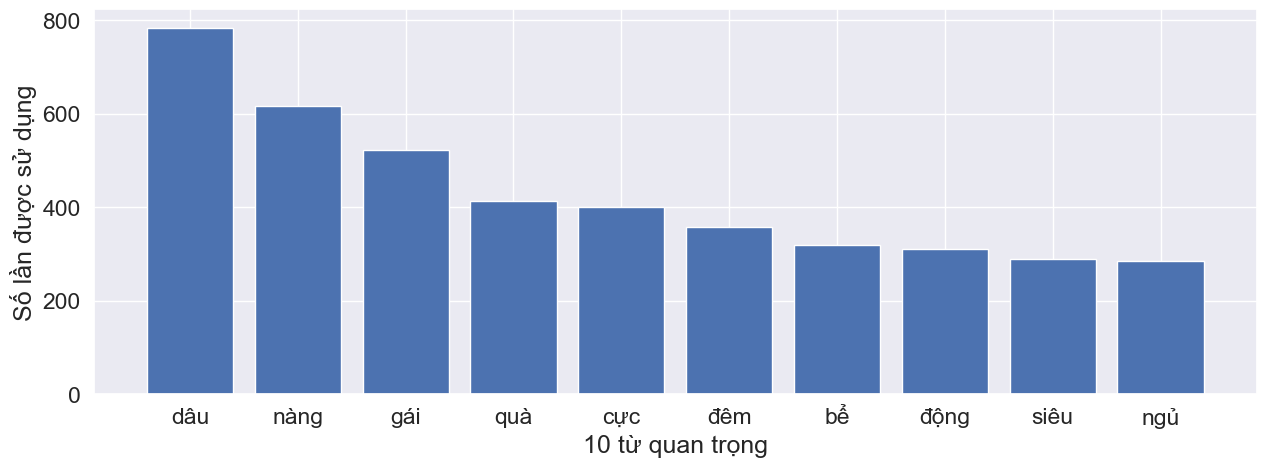

In [42]:
keys_list, values_list = zip(*top_10_elements)
plt.bar(x = keys_list, height = values_list)
plt.xlabel('10 từ quan trọng')
plt.ylabel('Số lần được sử dụng')

## Phân tích comment post

In [70]:
post_list = np.load("Data/Datadiana.vietnam.npy",allow_pickle=True)
post_list = post_list.tolist()
res = []
res=[]
for post in post_list:
    if len(post['comments_full']) > 0:
      print(post['comments_full'])
      cmt = '\n'.join([comment['comment_text'] for comment in post['comments_full'] ])
      res.append(cmt)

[{'comment_id': '785125086705176', 'comment_url': 'https://facebook.com/785125086705176', 'commenter_id': '61551383723358', 'commenter_url': 'https://facebook.com/profile.php?id=61551383723358&eav=AfZiuzIL6UwKd2W_7PbfzeOHZ_pSasRBGIevSrzkxMpZu9kR2ReRSjBwlO8DU-qzUq8&fref=nf&rc=p&refid=52&__tn__=R&paipv=0', 'commenter_name': 'Trần Ngân Hà', 'commenter_meta': None, 'comment_text': 'Amazing', 'comment_time': datetime.datetime(2023, 11, 8, 0, 0), 'comment_image': None, 'comment_reactors': [], 'comment_reactions': None, 'comment_reaction_count': None, 'replies': []}, {'comment_id': '1557627211674902', 'comment_url': 'https://facebook.com/1557627211674902', 'commenter_id': '100086499242627', 'commenter_url': 'https://facebook.com/profile.php?id=100086499242627&eav=AfagEVFTAMvhdfyUFHYibq3nC_158v8rc3O_r9Sqxgjwp-VCUl3nnXthi328ODWeNsk&fref=nf&rc=p&refid=52&__tn__=R&paipv=0', 'commenter_name': 'Trúc Quỳnh', 'commenter_meta': None, 'comment_text': 'Chụp app được không Diana=(', 'comment_time': datet

['Amazing\nChụp app được không Diana=(\nBaeni Baeni PuPu Thiện Anh 171\n🤕\nThảo Vy Nguyễn',
 'Đã xài và quyết định lần sau xài tiếp\nNhờ có em ý mà mình thoải mái vận động mà không lo tràn luôn\nThanh Ngọc mua xài đi, thấm hút tốt lắm đáy',
 'Công nhận xài em này cool lắm ấy\ndùng hàng Diana rất mềm siêu thoáng nữa.♥️\nMua sản phẩm có được tặng kèm gì không ad?\ncông nhận xài em này cool lắm ấy\n❤️\n❣️❣️\n☘☘\n☘☘\n✌️✌️\n♥️♥️\n☘️☘️☘️\n❤️\n👆 👆\n🥰🥰🥰\n😘😘😘\n👏👏\n❤️\n🍀🍀\n💚💚💚\n🌷🌷\n🌺🌺\n💖💖\n✌️✌️\n🤗🤗\n👆 👆\n😍\n🍀🍀\n💟\n💖💖',
 '🔥 CHẤN ĐỘNG: Diana mở rộng thể lệ để chị em tự do review sáng tạo, rước liền siêu phẩm. Nắm thông tin, rinh quà HOT ngay tại: https://bom.so/\n0Xuhzu\nREVIEW NGƯỢC nghĩa là sao ad? Diana Vietnam ?\nĐã dùng từ tháng 10 rồi rất tuyệt\nhaha',
 'Dùng nhiều loại nhưng k loại nào ưng bằng loại này. Dùng bao phê. Cảm giác thoải mái và rất an toàn\nCông nhận dùng thích thật, vận động thoải mái không lo tràn dâu luôn\nMua ở đâu thì yên tâm về chất lượng nhỉ?\nHâuk Đào xài là ưng nha, thử

In [71]:
res

['Amazing\nChụp app được không Diana=(\nBaeni Baeni PuPu Thiện Anh 171\n🤕\nThảo Vy Nguyễn',
 'Đã xài và quyết định lần sau xài tiếp\nNhờ có em ý mà mình thoải mái vận động mà không lo tràn luôn\nThanh Ngọc mua xài đi, thấm hút tốt lắm đáy',
 'Công nhận xài em này cool lắm ấy\ndùng hàng Diana rất mềm siêu thoáng nữa.♥️\nMua sản phẩm có được tặng kèm gì không ad?\ncông nhận xài em này cool lắm ấy\n❤️\n❣️❣️\n☘☘\n☘☘\n✌️✌️\n♥️♥️\n☘️☘️☘️\n❤️\n👆 👆\n🥰🥰🥰\n😘😘😘\n👏👏\n❤️\n🍀🍀\n💚💚💚\n🌷🌷\n🌺🌺\n💖💖\n✌️✌️\n🤗🤗\n👆 👆\n😍\n🍀🍀\n💟\n💖💖',
 '🔥 CHẤN ĐỘNG: Diana mở rộng thể lệ để chị em tự do review sáng tạo, rước liền siêu phẩm. Nắm thông tin, rinh quà HOT ngay tại: https://bom.so/\n0Xuhzu\nREVIEW NGƯỢC nghĩa là sao ad? Diana Vietnam ?\nĐã dùng từ tháng 10 rồi rất tuyệt\nhaha',
 'Dùng nhiều loại nhưng k loại nào ưng bằng loại này. Dùng bao phê. Cảm giác thoải mái và rất an toàn\nCông nhận dùng thích thật, vận động thoải mái không lo tràn dâu luôn\nMua ở đâu thì yên tâm về chất lượng nhỉ?\nHâuk Đào xài là ưng nha, thử

In [75]:
stop_words = []
with open('Data/vietnamese-stopwords.txt', 'r') as file:
    for line in file:
        stop_words.append(line.strip())
print(stop_words)

['a lô', 'a ha', 'ai', 'ai ai', 'ai nấy', 'ai đó', 'alô', 'amen', 'anh', 'anh ấy', 'ba', 'ba ba', 'ba bản', 'ba cùng', 'ba họ', 'ba ngày', 'ba ngôi', 'ba tăng', 'bao giờ', 'bao lâu', 'bao nhiêu', 'bao nả', 'bay biến', 'biết', 'biết bao', 'biết bao nhiêu', 'biết chắc', 'biết chừng nào', 'biết mình', 'biết mấy', 'biết thế', 'biết trước', 'biết việc', 'biết đâu', 'biết đâu chừng', 'biết đâu đấy', 'biết được', 'buổi', 'buổi làm', 'buổi mới', 'buổi ngày', 'buổi sớm', 'bà', 'bà ấy', 'bài', 'bài bác', 'bài bỏ', 'bài cái', 'bác', 'bán', 'bán cấp', 'bán dạ', 'bán thế', 'bây bẩy', 'bây chừ', 'bây giờ', 'bây nhiêu', 'bèn', 'béng', 'bên', 'bên bị', 'bên có', 'bên cạnh', 'bông', 'bước', 'bước khỏi', 'bước tới', 'bước đi', 'bạn', 'bản', 'bản bộ', 'bản riêng', 'bản thân', 'bản ý', 'bất chợt', 'bất cứ', 'bất giác', 'bất kì', 'bất kể', 'bất kỳ', 'bất luận', 'bất ngờ', 'bất nhược', 'bất quá', 'bất quá chỉ', 'bất thình lình', 'bất tử', 'bất đồ', 'bấy', 'bấy chầy', 'bấy chừ', 'bấy giờ', 'bấy lâu', 'bấy lâ

In [76]:
sentence_list = res
for i in range(len(sentence_list)):
  sentence_list[i] = " ".join([word for word in sentence_list[i].split() if word not in stop_words])
text = str(sentence_list)

In [77]:
import re
# xoá icon trong văn bản
def remove_icons_keep_words_with_accents(text):
    text_no_icons = re.sub(r'[^\w\s]', '', text)
    
    words = text_no_icons.split()

    words_with_accents = [word for word in words if any(char for char in word if char.isalpha() and char.isascii() == False)]
    
    result_text = ' '.join(words_with_accents)
    
    return result_text
text = remove_icons_keep_words_with_accents(text)

In [79]:
# tính TF của từng từ
tf_score = {}
text_list = text.split()
for each_word in text_list:
    each_word = each_word.replace('.','')
    if each_word not in stop_words:
        if each_word in tf_score:
            tf_score[each_word] += 1
        else:
            tf_score[each_word] = 1
tf_score


{'Chụp': 1,
 'Thiện': 1,
 'Thảo': 6,
 'Nguyễn': 43,
 'Đã': 19,
 'xài': 10,
 'quyết': 1,
 'định': 1,
 'tiếp': 3,
 'Nhờ': 2,
 'thoải': 3,
 'mái': 3,
 'vận': 3,
 'động': 5,
 'tràn': 7,
 'Ngọc': 14,
 'đi': 20,
 'thấm': 8,
 'hút': 4,
 'lắm': 15,
 'đáy': 1,
 'Công': 5,
 'hàng': 7,
 'mềm': 1,
 'siêu': 7,
 'thoáng': 4,
 'sản': 9,
 'phẩm': 10,
 'tặng': 5,
 'kèm': 2,
 'công': 1,
 'CHẤN': 1,
 'ĐỘNG': 1,
 'rộng': 1,
 'thể': 4,
 'lệ': 2,
 'rước': 1,
 'liền': 2,
 'Nắm': 1,
 'thông': 12,
 'quà': 15,
 'NGƯỢC': 1,
 'nghĩa': 4,
 'tuyệt': 12,
 'Dùng': 3,
 'ưng': 5,
 'phê': 1,
 'Cảm': 6,
 'giác': 3,
 'toàn': 2,
 'dâu': 19,
 'yên': 2,
 'tâm': 2,
 'chất': 3,
 'Hâuk': 1,
 'Đào': 2,
 'thử': 4,
 'Lê': 12,
 'Thị': 27,
 'Gấumua': 1,
 'vần': 1,
 'thơ': 2,
 'Mình': 18,
 'mí': 2,
 'Đồng': 2,
 'chĩnh': 1,
 'hãng': 3,
 'Yêu': 5,
 'thương': 7,
 'Vũ': 5,
 'Thương': 1,
 'nè': 6,
 'khảo': 1,
 'Tiến': 1,
 'Đạt': 1,
 'Khỏi': 1,
 'cảm': 6,
 'ơn': 9,
 'Xài': 1,
 'hơi': 1,
 'vời': 11,
 'Quá': 1,
 'Quỳnh': 7,
 'Như': 5,
 'hiện

In [80]:
import math
from collections import Counter

def calculate_idf(corpus):
    total_documents = len(corpus)
    word_count_in_documents = Counter()

    for document in corpus:
        unique_words = set(document.split())
        word_count_in_documents.update(unique_words)

    idf_scores = {}
    for word, count in word_count_in_documents.items():
        idf_scores[word] = math.log(total_documents / (count + 1))

    return idf_scores

corpus =  text.split()

idf_scores = calculate_idf(corpus)

for word, idf_score in idf_scores.items():
    print(f" {word} : {idf_score:.4f}")

 Chụp : 6.8824
 Thiện : 6.8824
 Thảo : 5.6297
 Nguyễn : 3.7914
 Đã : 4.5799
 xài : 5.1777
 quyết : 6.8824
 định : 6.8824
 tiếp : 6.1893
 Nhờ : 6.4770
 thoải : 6.1893
 mái : 6.1893
 vận : 6.1893
 động : 5.7838
 tràn : 5.4961
 Ngọc : 4.8675
 đi : 4.5311
 thấm : 5.3784
 hút : 5.9661
 lắm : 4.8030
 đáy : 6.8824
 Công : 5.7838
 hàng : 5.4961
 mềm : 6.8824
 siêu : 5.4961
 thoáng : 5.9661
 nữa : 6.8824
 sản : 5.2730
 phẩm : 5.1777
 tặng : 5.7838
 kèm : 6.4770
 công : 6.8824
 CHẤN : 6.8824
 ĐỘNG : 6.8824
 rộng : 6.8824
 thể : 5.9661
 lệ : 6.4770
 tạo : 6.8824
 rước : 6.8824
 liền : 6.4770
 Nắm : 6.8824
 thông : 5.0106
 quà : 4.8030
 tại : 6.8824
 NGƯỢC : 6.8824
 nghĩa : 5.9661
 tuyệt : 5.0106
 Dùng : 6.1893
 ưng : 5.7838
 này : 5.9661
 phê : 6.8824
 Cảm : 5.6297
 giác : 6.1893
 toàn : 6.4770
 thật : 6.8824
 dâu : 4.5799
 yên : 6.4770
 tâm : 6.4770
 chất : 6.1893
 nhỉ : 6.8824
 Hâuk : 6.8824
 Đào : 6.4770
 thử : 5.9661
 Lê : 5.0106
 Thị : 4.2434
 nhé : 5.3784
 Gấumua : 6.8824
 vần : 6.8824
 thơ

In [81]:
# tính idf*tf của mỗi từ
value_tf = tf_score.values()
value_idf = idf_scores.values()
key_tfidf = tf_score.keys()
key_tfidf = list(key_tfidf)
value_idf = list(value_idf)
value_tf = list(value_tf)
values_tfidf = []
for i in range(len(tf_score)):
    values_tfidf.append(value_idf[i]*value_tf[i])
tfidf_score = dict(zip(key_tfidf, values_tfidf))

In [82]:
top_10_elements = sorted(tfidf_score.items(), key=lambda x: x[1], reverse=True)[:10]
top_10_elements

[('Tùng', 468.0057480278536),
 ('Sơn', 330.3255905073738),
 ('Hóng', 172.06093677494619),
 ('Thị', 167.11083784182335),
 ('hộ', 165.17849930394834),
 ('Nguyễn', 163.02998575849983),
 ('gói', 158.2960618329505),
 ('Có', 142.2711392250473),
 ('dâu', 130.7663119489591),
 ('đêm', 130.7663119489591)]

Text(0, 0.5, 'Số lần được sử dụng')

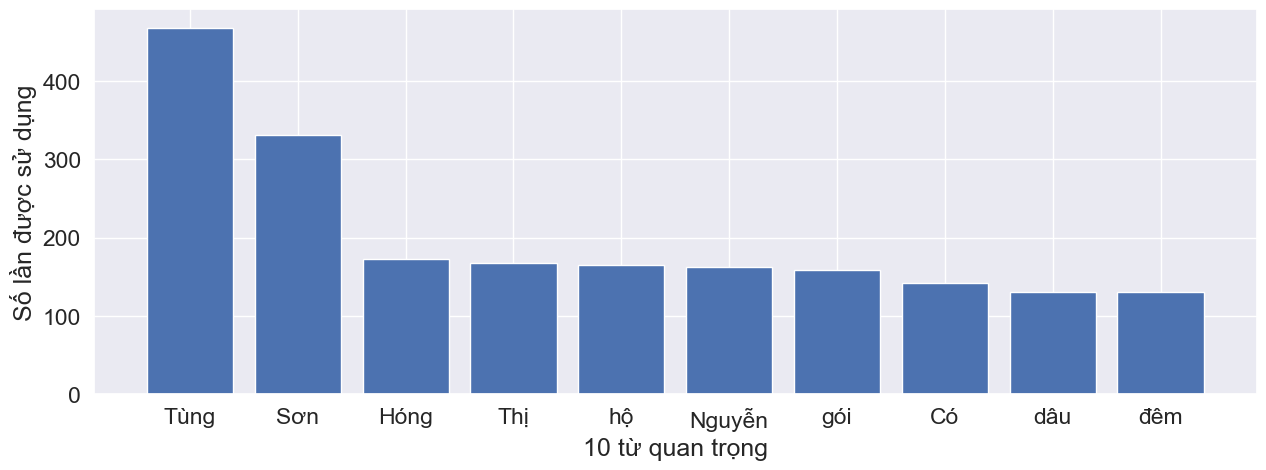

In [83]:
keys_list, values_list = zip(*top_10_elements)
plt.bar(x = keys_list, height = values_list)
plt.xlabel('10 từ quan trọng')
plt.ylabel('Số lần được sử dụng')

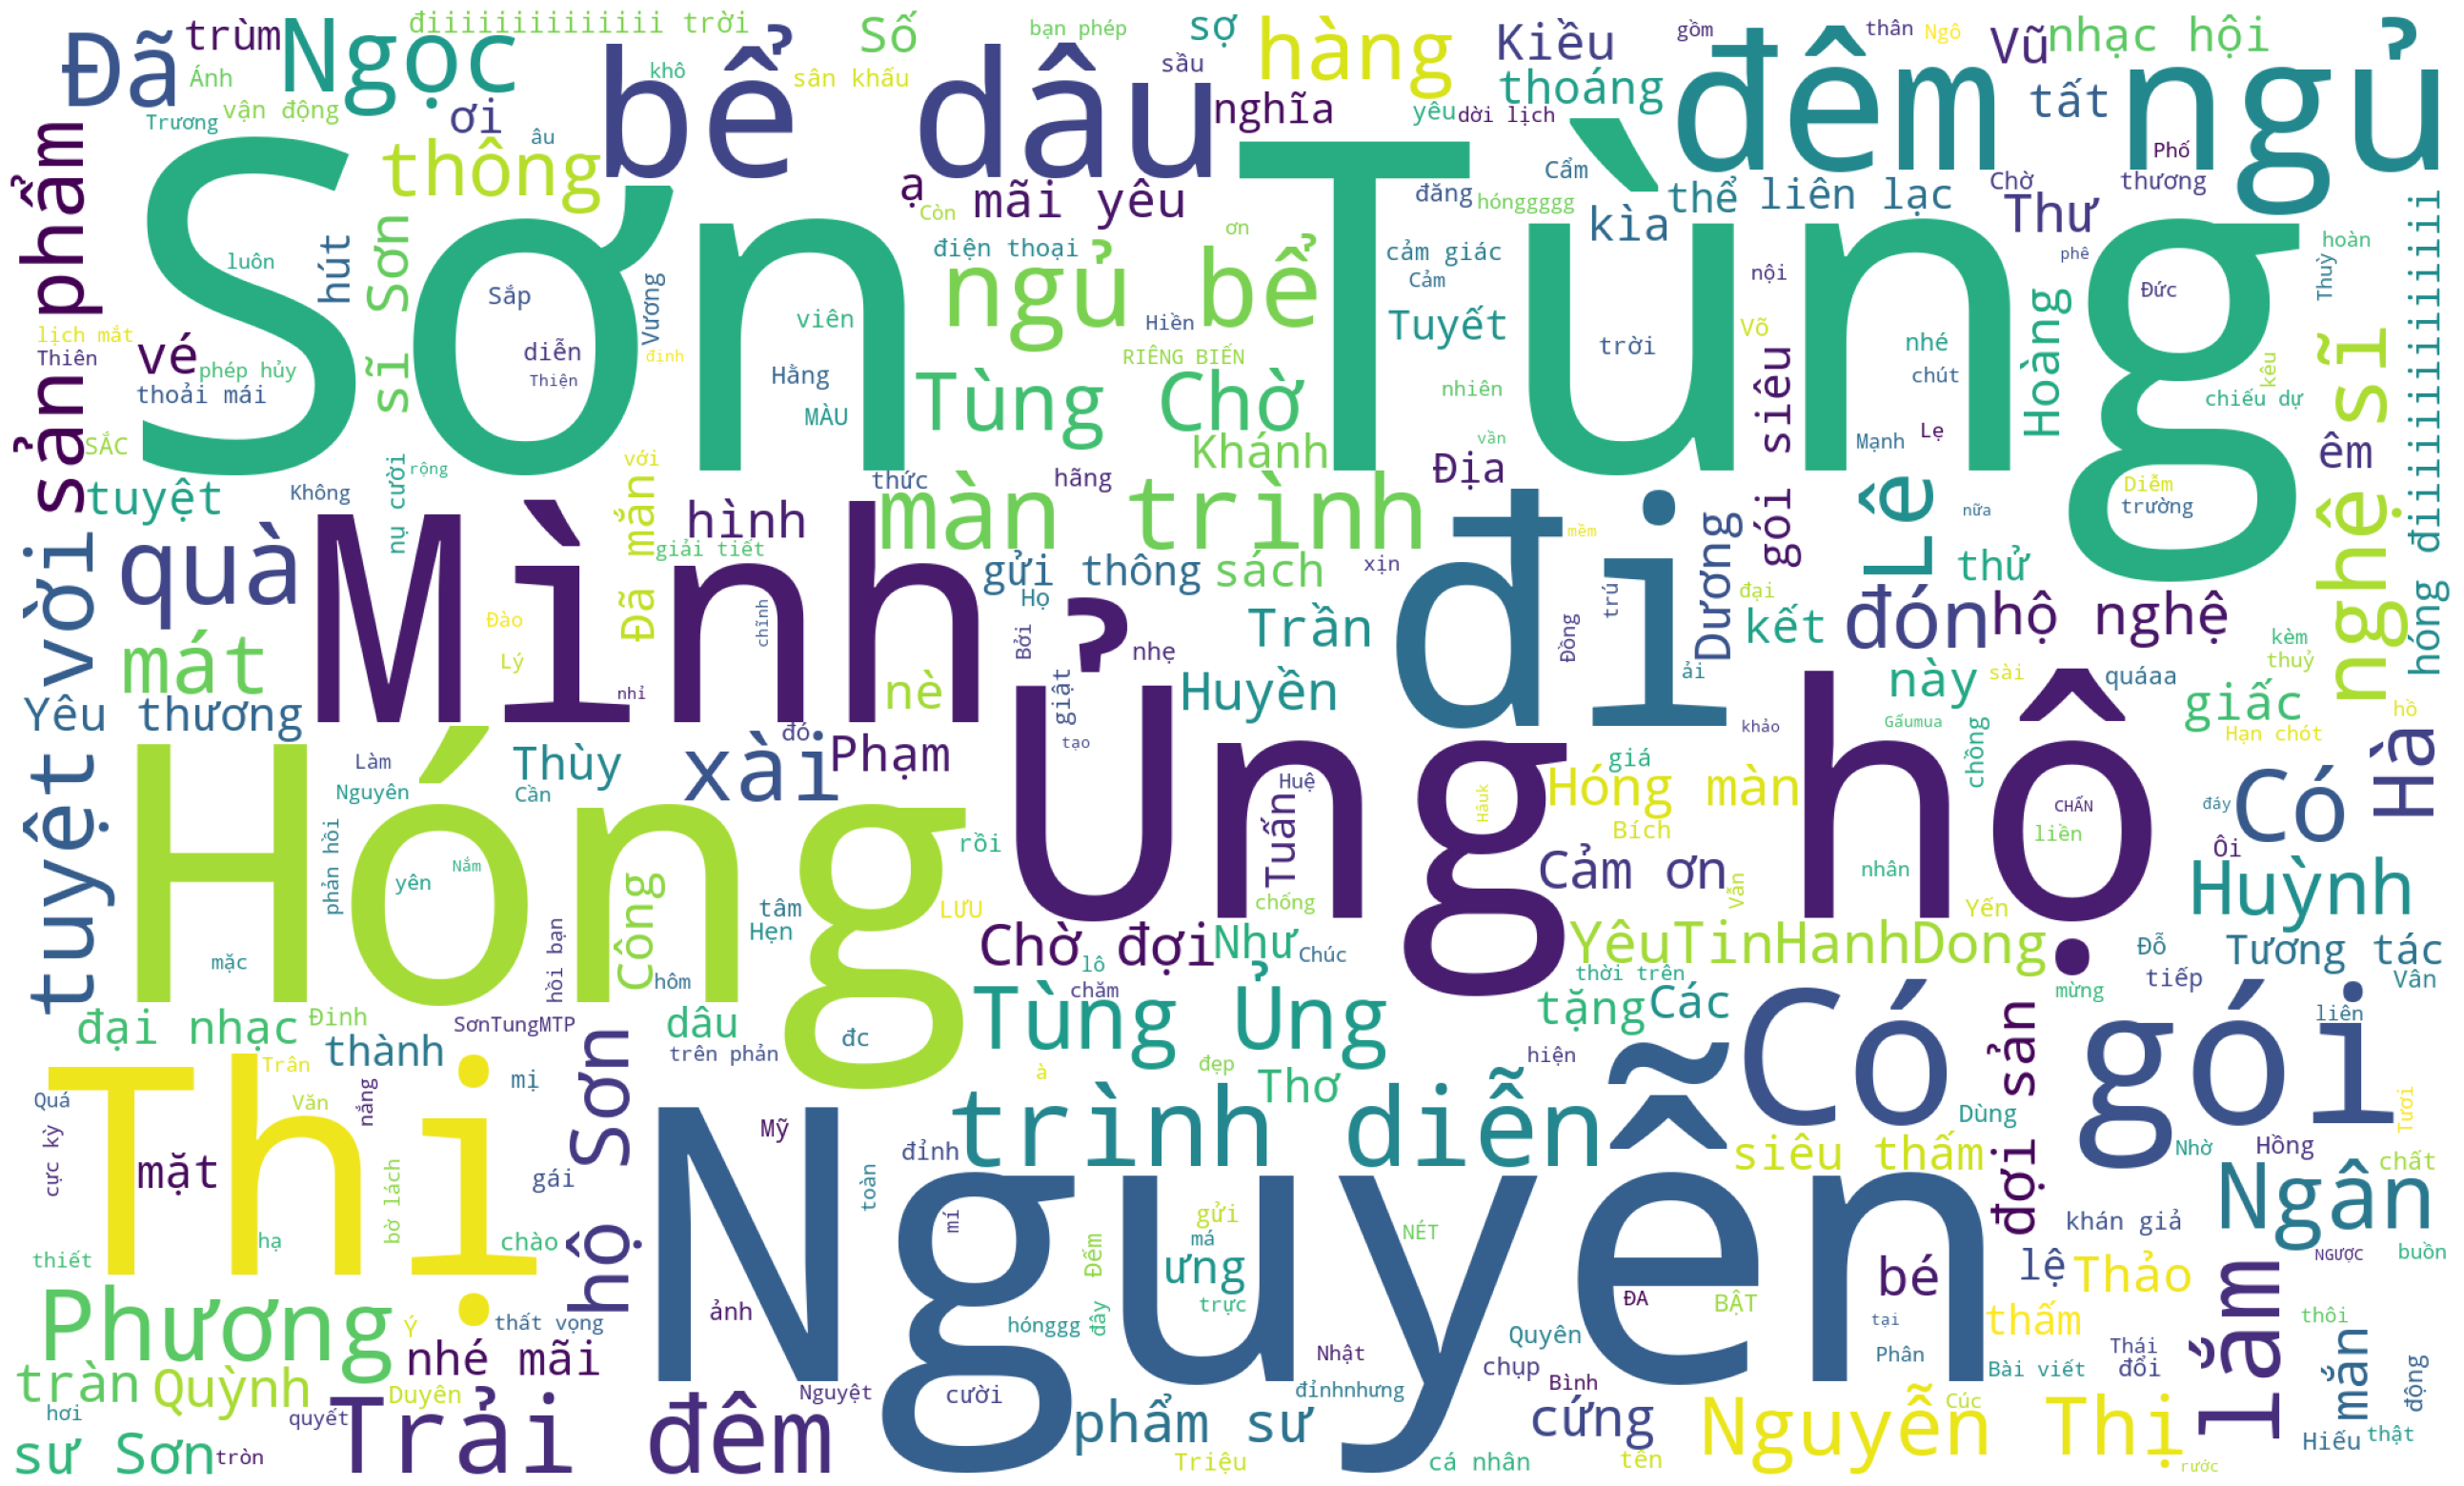

In [84]:
from wordcloud import WordCloud, STOPWORDS

wordcloud = WordCloud(stopwords=STOPWORDS,
                          background_color='white', 
                      max_words=300,
                      width=2000, height=1200
                         ).generate(text)
plt.figure(figsize=(40,20))
plt.clf()
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

## Profile facebook của người comment

In [25]:
# lấy dữ liệu 
profile_df_1 = pd.read_excel('Data_profile1.xlsx')
profile_df_2 = pd.read_excel('Data_profile2.xlsx')
profile_df_3 = pd.read_excel('Data_profile3.xlsx')
profile_df_4 = pd.read_excel('Data_profile4.xlsx')
profile_df_5 = pd.read_excel('Data_profile5.xlsx')
profile_df_1 = profile_df_1[['id','Name','Thông tin cơ bản']][profile_df_1['Thông tin cơ bản'].notna()]
profile_df_2 = profile_df_2[['id','Name','Thông tin cơ bản']][profile_df_2['Thông tin cơ bản'].notna()]
profile_df_3 = profile_df_3[['id','Name','Thông tin cơ bản']][profile_df_3['Thông tin cơ bản'].notna()]
profile_df_4 = profile_df_4[['id','Name','Thông tin cơ bản']][profile_df_4['Thông tin cơ bản'].notna()]
profile_df_5 = profile_df_5[['id','Name','Thông tin cơ bản']][profile_df_5['Thông tin cơ bản'].notna()]
profile_df = pd.concat([profile_df_1,profile_df_2,profile_df_3,profile_df_4,profile_df_5], axis=0)
profile_df


id            Name Thông tin cơ bản
0   6.155138e+13    Trần Ngân Hà    Nữ\nGiới tính
1   1.000865e+14      Trúc Quỳnh    Nữ\nGiới tính
2   1.000102e+14         Ludu Du   Nam\nGiới tính
3   1.000789e+14   Tâm Oan Quách    Nữ\nGiới tính
4   1.000124e+14  Thảo Vy Nguyễn    Nữ\nGiới tính
..           ...             ...              ...
29  1.000349e+14       Thảo Thảo    Nữ\nGiới tính
30  1.000801e+14         Yến Nhi    Nữ\nGiới tính
31  1.000395e+14      Quynh Tram    Nữ\nGiới tính
32  1.000577e+14       Thuy Dung    Nữ\nGiới tính
33  1.000750e+14     Thương Hoài    Nữ\nGiới tính

[209 rows x 3 columns]

In [27]:
# thay đổi dữ liệu cột thông tin cơ bản
profile_df['Thông tin cơ bản'] = np.where(profile_df['Thông tin cơ bản'].str.contains('Nữ\nGiới tính'), 'Nữ', np.where(profile_df['Thông tin cơ bản'].str.contains('Nam\nGiới tính'), 'Nam', profile_df['Thông tin cơ bản']))
profile_df

id            Name Thông tin cơ bản
0   6.155138e+13    Trần Ngân Hà               Nữ
1   1.000865e+14      Trúc Quỳnh               Nữ
2   1.000102e+14         Ludu Du              Nam
3   1.000789e+14   Tâm Oan Quách               Nữ
4   1.000124e+14  Thảo Vy Nguyễn               Nữ
..           ...             ...              ...
29  1.000349e+14       Thảo Thảo               Nữ
30  1.000801e+14         Yến Nhi               Nữ
31  1.000395e+14      Quynh Tram               Nữ
32  1.000577e+14       Thuy Dung               Nữ
33  1.000750e+14     Thương Hoài               Nữ

[209 rows x 3 columns]

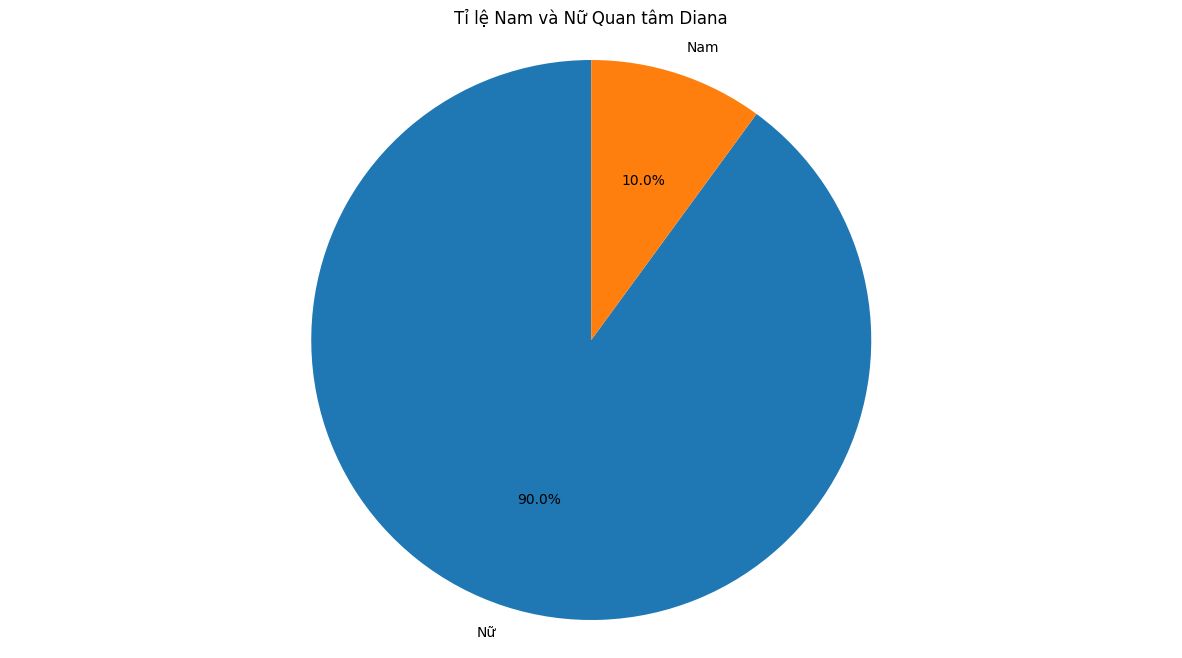

In [31]:
gender_counts = profile_df['Thông tin cơ bản'].value_counts()

# Vẽ biểu đồ pie
plt.figure(figsize=(15, 8))
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', startangle=90)
plt.axis('equal')
plt.title('Tỉ lệ Nam và Nữ Quan tâm Diana')
plt.show()